# The big idea

Here, I am taking some of the code that I had written in `Prototyping final variable list.ipynb` and (1) copying the minimal reproducible code over to a python script, then (2) refactoring that code into reusable and composable functions.

In [2]:
%run ../prototype_of_variability_full_criteria.py

WSERV7:
  VLMS stars in our data: 103
  VLMS Q=2 stars: 70
  VLMS Q=2 variables (ignoring periodicity): 29
  VLMS Q=2 'almost' variables: 9
  VLMS Q=2 periodic: 23
  VLMS Q=2 variables (incl. periodics): 35

BDs:                103
BDs (Q=2):          70
Periodic BDs:       29
Periodic BDs (Q=2): 23
Variable BDs (Q=2): 29
  '' - periodics  : 12
Variable BDs (Q=1): 31
  '' - v2:          2
V0 BDs (Q=0):       10
Variable BDs (Q=1+2+per): 41



NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68
6
70 29 31 29 23 6
47 103


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%run ../prototype2_of_variability_full_criteria.py

WSERV5:


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26



WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

Disks: 56 (Stat: 43)
Non-disks: 42 (Stat: 26)
Variable Disks: 38 (Stat: 30)
Variable Non-disks: 8 (Stat: 6)
Statistical DISKED variability rate: 30/43 = 0.70
Statistical DISKED periodicity rate: 18/43 = 0.42
Statistical NONDISKED variability rate: 6/26 = 0.23
Statistical NONDISKED periodicity rate: 6/26 = 0.23


WSERV8:
Ref: 225 (Stat: 181)
v2: 37 (37)
v1: 40 (39)
v_per: 25 (22)
v_subj: 6 (2)
59 225
v_total: 59 (51)
Statistical variability rate: 51/181 = 0.28
Statistical periodicity rate: 22/181 = 0.12

Disks: 92 (Stat: 73)
Non-disks: 122 (Stat: 107)
Variable Disks: 37 (Stat: 33)
Variable Non-disks: 20 (Sta

In [4]:
# np.sum(new_v1 & new_ref), np.sum(new_v2 & new_ref), np.sum((new_v1 | new_v2) & new_ref)

In [5]:
# np.sum(new_v_per & new_ref)

In [6]:

wserv_ids = [1, 5, 7, 8, 11]
n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

n_min_dict = {wserv: n_min for (wserv, n_min) in zip(wserv_ids, n_min_list)}

In [7]:
n_min_dict[7]

80

In [8]:
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


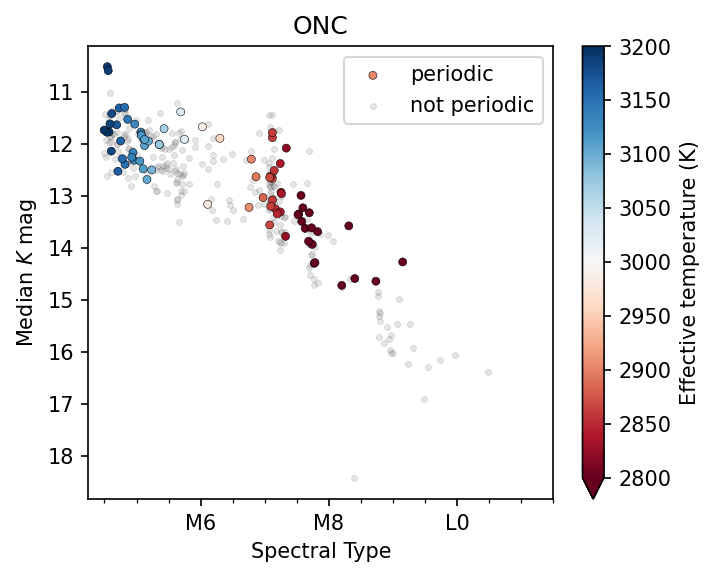

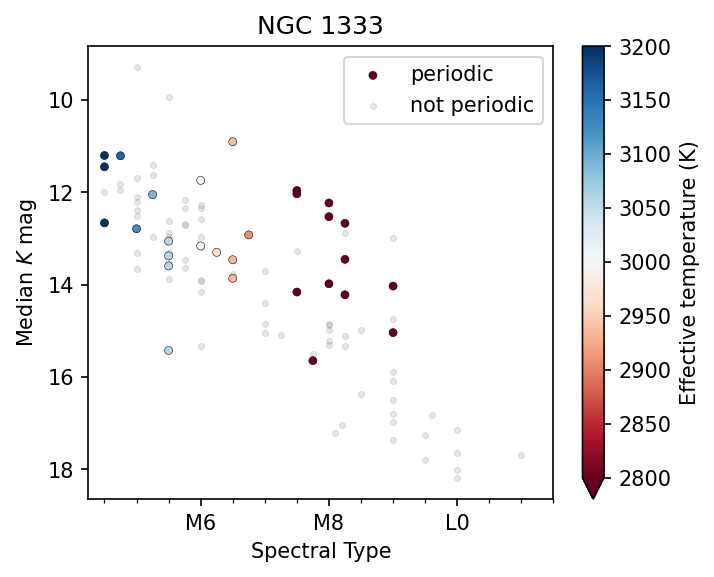

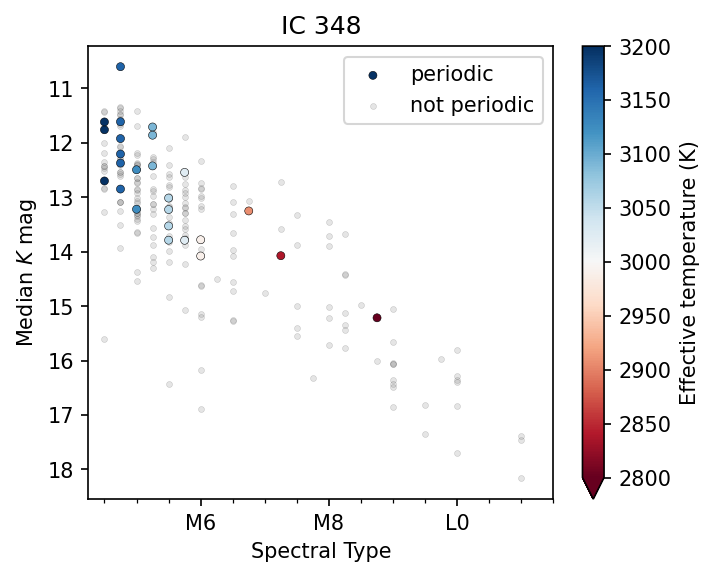

In [9]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='periodic',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not periodic",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


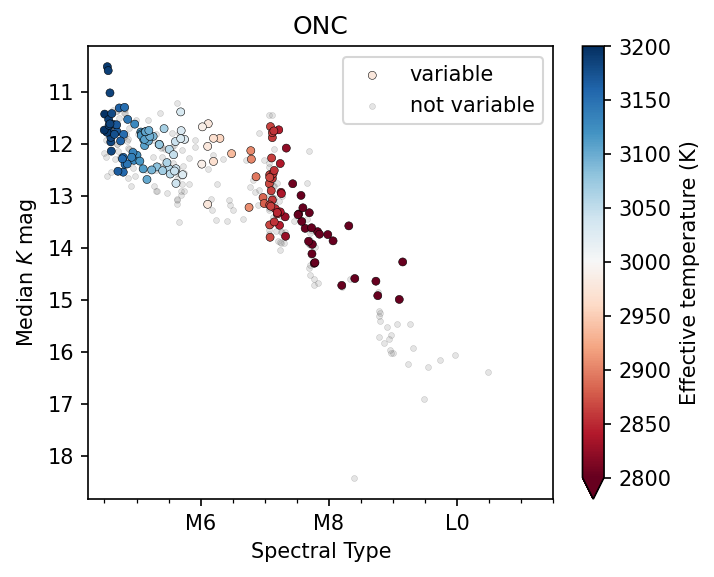

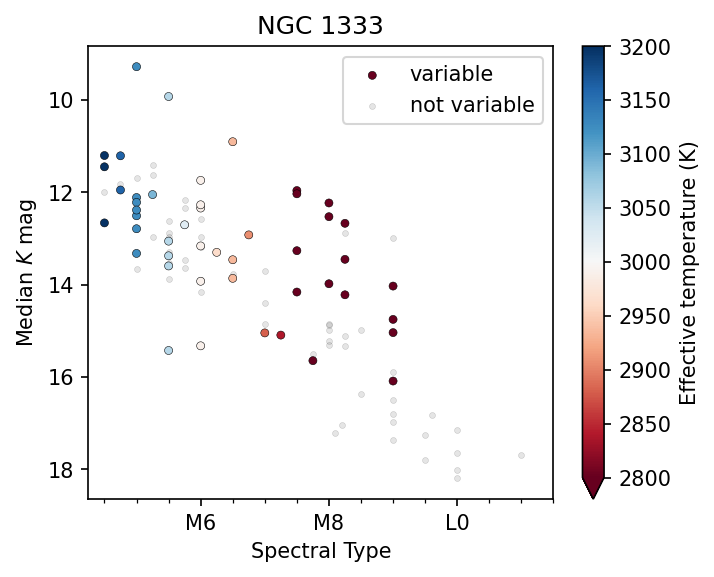

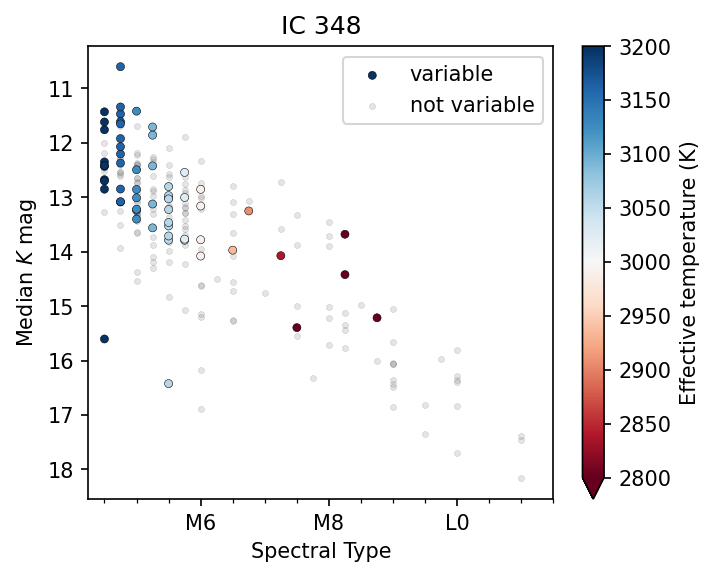

In [10]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='variable',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not variable",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


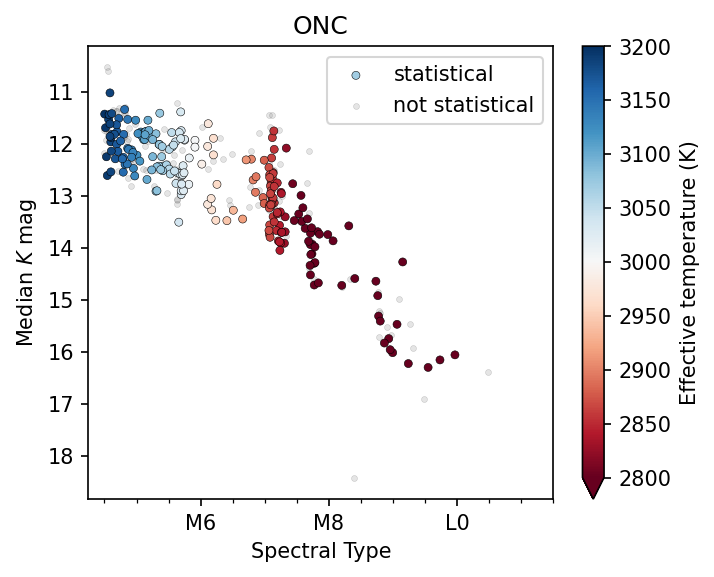

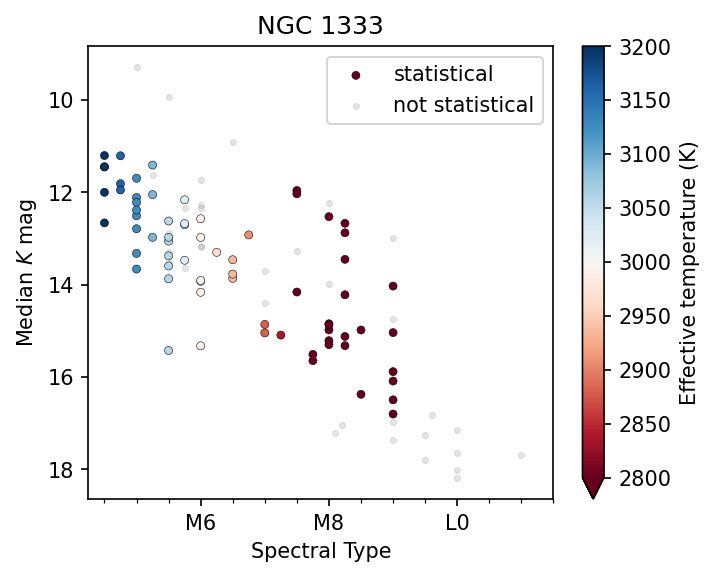

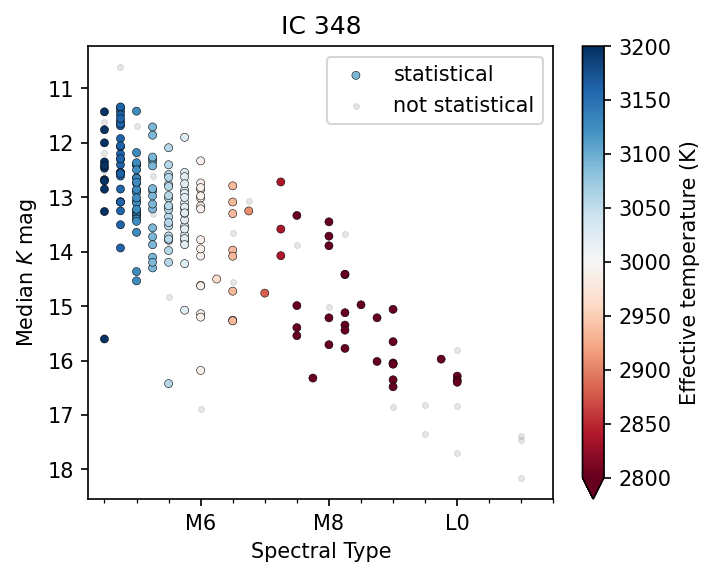

In [11]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=150)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][x_crit], 
        x_match.approved['median_KAPERMAG3'][x_crit], 
        s=15, 
        ec='k',
        linewidths=0.25,
        c=x_match.approved['Teff'][x_crit],
        cmap='RdBu',
        vmin=2800,
        vmax=3200,
        label='statistical',
        zorder=10
    )
    ax.scatter(
        x_match.approved['SpT'], 
        x_match.approved['median_KAPERMAG3'], 
#         marker='s',
        s=8, 
        ec='k',
        linewidths=0.25,
        c='0.5',
        alpha=0.2,
        label="not statistical",
        zorder=-10,
    )

    ax.invert_yaxis()    

    cbar = plt.colorbar(sc, extend='min')
    cbar.set_label("Effective temperature (K)")

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])

    plt.legend()
    

In [12]:
138 + 47 + 59

244

In [13]:
225 + 103 + 330

658

In [14]:
len(onc_match.lowmass) + len(ngc_match.lowmass) + len(ic_match.lowmass)

733

In [15]:
# I'm trying a sketch I made. It drops the colormapping in favor of another approach.

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


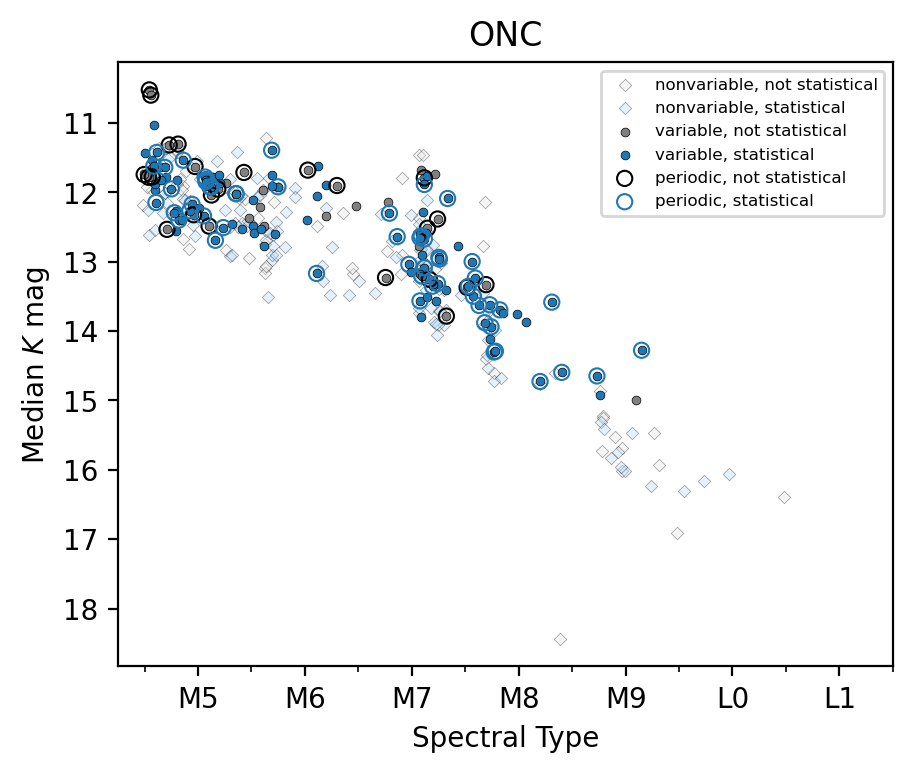

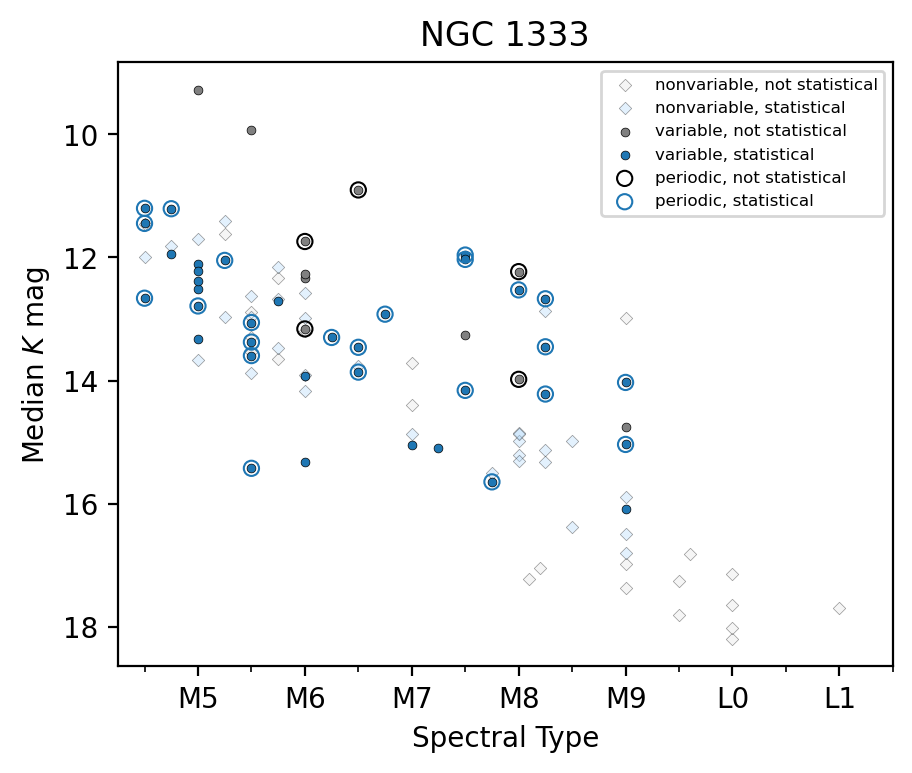

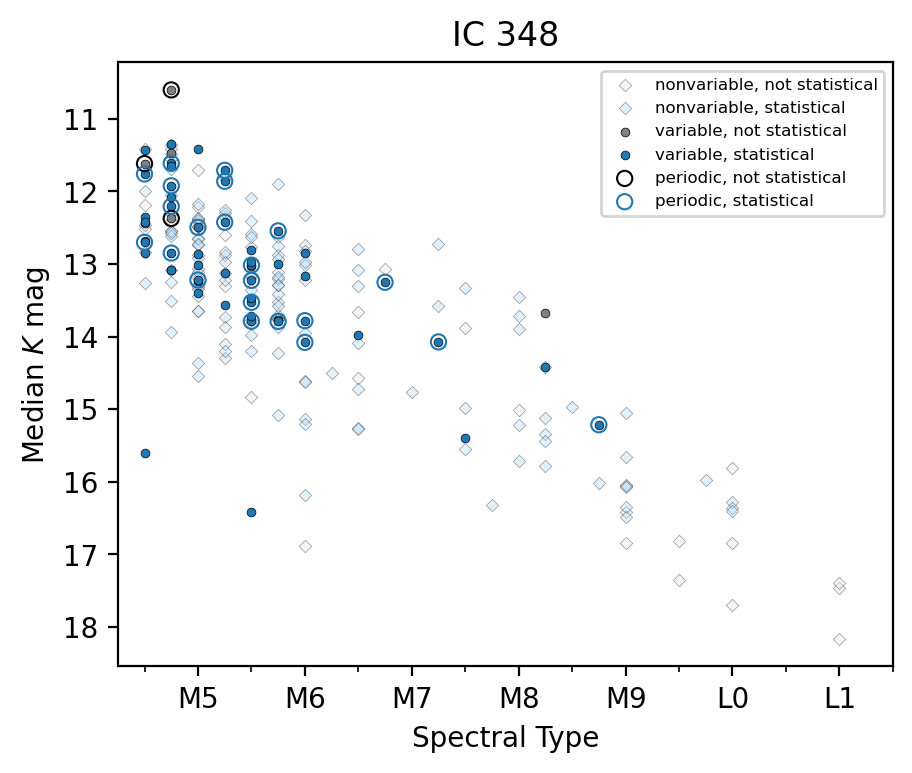

In [16]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['median_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['median_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['median_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['median_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['median_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['median_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
    ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Median $K$ mag")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
    plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


# March 24

Tom wants to work on some of the following ideas or issues:

1. Variability fraction (binned) as as function of spectral type

2. Variability amplitude vs SpT (all, periodic, non-periodic)

3. Color vs SpT (H-K)

4. HR diagram color-coded by
(a) amplitude
(b) rotation period

5. Sensitivity plots as a function of magnitude

6. Baraffe 2015 isochrones.

In [17]:
# Can we load up some info from the 



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 5.5
In this bin :  116
In this bin & stat :  72
In this bin & stat & variable :  38
Variability fraction in this bin :  0.5277777777777778 ± 0.11531573820922277

5.5 6.5
In this bin :  60
In this bin & stat :  41
In this bin & stat & variable :  15
Variability fraction in this bin :  0.36585365853658536 ± 0.147439072364752

6.5 7.5
In this bin :  93
In this bin & stat :  61
In this bin & stat & variable :  28
Variability fraction in this bin :  0.45901639344262296 ± 0.12505391843584007

7.5 8.5
In this bin :  40
In this bin & stat :  27
In this bin & stat & variable :  18
Variability fraction in this bin :  0.6666666666666666 ± 0.17781481095759366

8.5 10.01
In this bin :  25
In this bin & stat :  14
In this bin & stat & variable :  3
Variability fraction in this bin :  0.21428571428571427 ± 0.21494185260204676



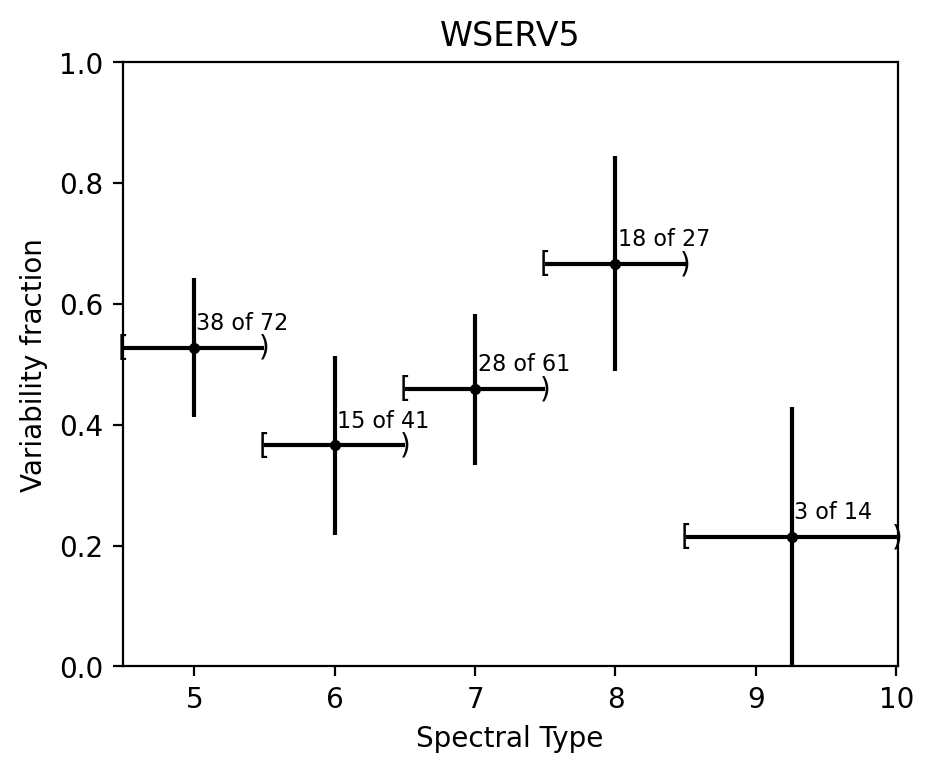

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 5.5
In this bin :  21
In this bin & stat :  19
In this bin & stat & variable :  12
Variability fraction in this bin :  0.631578947368421 ± 0.21690287721140628

5.5 6.5
In this bin :  29
In this bin & stat :  18
In this bin & stat & variable :  8
Variability fraction in this bin :  0.4444444444444444 ± 0.2295579338492601

6.5 7.5
In this bin :  10
In this bin & stat :  7
In this bin & stat & variable :  5
Variability fraction in this bin :  0.7142857142857143 ± 0.3346640106136302

7.5 8.5
In this bin :  22
In this bin & stat :  17
In this bin & stat & variable :  8
Variability fraction in this bin :  0.47058823529411764 ± 0.23727333662069458

8.5 10.01
In this bin :  19
In this bin & stat :  8
In this bin & stat & variable :  3
Variability fraction in this bin :  0.375 ± 0.33548006647191425



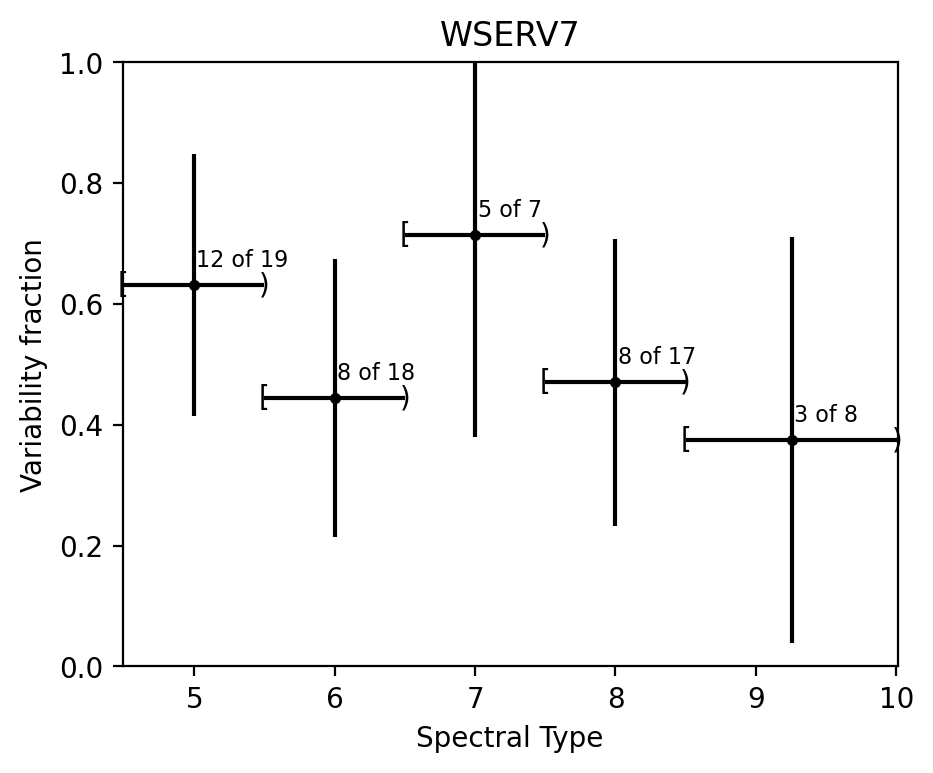

WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225

4.49 5.5
In this bin :  101
In this bin & stat :  80
In this bin & stat & variable :  29
Variability fraction in this bin :  0.3625 ± 0.10534287766621908

5.5 6.5
In this bin :  65
In this bin & stat :  58
In this bin & stat & variable :  16
Variability fraction in this bin :  0.27586206896551724 ± 0.11502671510742453

6.5 7.5
In this bin :  16
In this bin & stat :  13
In this bin & stat & variable :  3
Variability fraction in this bin :  0.23076923076923078 ± 0.22903490301738305

7.5 8.5
In this bin :  19
In this bin & stat :  16
In this bin & stat & variable :  2
Variability fraction in this bin :  0.125 ± 0.16205226780270618

8.5 10.01
In this bin :  21
In this bin & stat :  14
In this bin & stat & variable :  1
Variability fraction in this bin :  0.07142857142857142 ± 0.13490737563232041



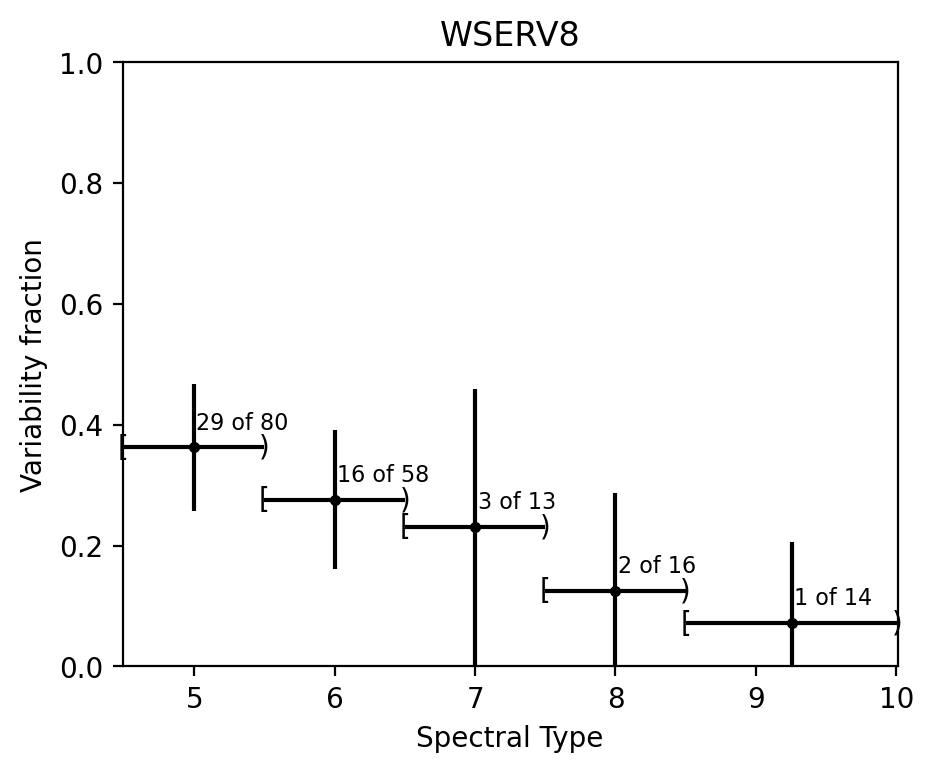

In [18]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 5.5, 6.5, 7.5, 8.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    
    fig = plt.figure(figsize=(5,4), dpi=200)    
    ax = fig.add_subplot(111)

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
#        errorbar_size = 1 / np.sqrt(bin_stat)
# see: https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval
        z = 1.96
        p = stat_var_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Variability fraction in this bin : ", stat_var_fraction, "±", errorbar_size)
        
        print("")
        
        ax.errorbar([(left+right)/2], [stat_var_fraction], fmt='k.', yerr=errorbar_size)
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color='k')
        
        ax.text((left+right)/2 + 0.02, stat_var_fraction + 0.03, f"{bin_var_stat} of {bin_stat}", fontsize=8)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict)
        ax.text(right, stat_var_fraction, ")", center_dict)
        
    plt.xlim(bin_edges[0], bin_edges[-1])
    plt.ylim(0, 1)
    plt.title("WSERV" + str(wserv))
    plt.xlabel("Spectral Type")
    plt.ylabel("Variability fraction")
    plt.show()
    
    
#     fig = plt.figure(figsize=(5,4), dpi=200)

    
#     ax.scatter(
#         x_match.approved['SpT'][nonvar], 
#         x_match.approved['median_KAPERMAG3'][nonvar], 
#         marker='D',
#         s=10, 
#         linewidths=0.25,
#         c='0.9',
#         ec='k',
#         label='nonvariable, not statistical',
#         alpha=0.4,
#     )
#     ax.scatter(
#         x_match.approved['SpT'][nonvar_stat], 
#         x_match.approved['median_KAPERMAG3'][nonvar_stat], 
#         marker='D',
#         s=10, 
#         linewidths=0.25,
#         c='#bbdefb',
#         ec='k',
#         label='nonvariable, statistical',
#         alpha=0.4,
#     )
#     ax.scatter(
#         x_match.approved['SpT'][var], 
#         x_match.approved['median_KAPERMAG3'][var], 
#         s=10, 
#         linewidths=0.25,
#         c='0.5',
#         ec='k',
#         label='variable, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][var_stat], 
#         x_match.approved['median_KAPERMAG3'][var_stat], 

#         s=10, 
#         linewidths=0.25,
#         c='C0',
#         ec='k',
#         label='variable, statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per], 
#         x_match.approved['median_KAPERMAG3'][per], 
#         s=30, 
#         linewidths=0.75,
#         facecolor='None',
#         ec='k',
#         label='periodic, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_stat], 
#         x_match.approved['median_KAPERMAG3'][per_stat], 
#         s=30, 
#         linewidths=0.75,
#         facecolor='None',
#         ec='C0',
#         label='periodic, statistical'
#     )
    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
#     ax.set_ylabel("Median $K$ mag")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
#     ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [19]:
plt.axhline

<function matplotlib.pyplot.axhline(y=0, xmin=0, xmax=1, **kwargs)>

WSERV5:
138 330

4.49 6.0
In this bin :  157
In this bin & stat :  102
In this bin & stat & variable :  48
Variability fraction in this bin :  0.47058823529411764

6.0 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & variable :  33
Variability fraction in this bin :  0.4583333333333333

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & variable :  21
Variability fraction in this bin :  0.5121951219512195



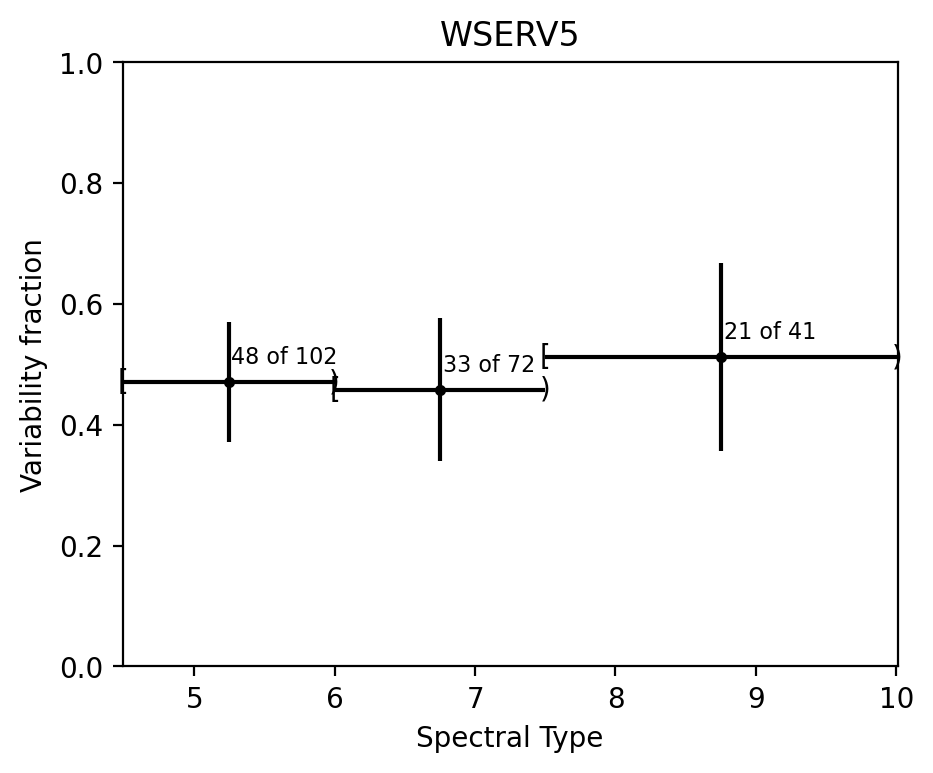

WSERV7:
47 103

4.49 6.0
In this bin :  38
In this bin & stat :  30
In this bin & stat & variable :  17
Variability fraction in this bin :  0.5666666666666667

6.0 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & variable :  8
Variability fraction in this bin :  0.5714285714285714

7.5 10.01
In this bin :  41
In this bin & stat :  25
In this bin & stat & variable :  11
Variability fraction in this bin :  0.44



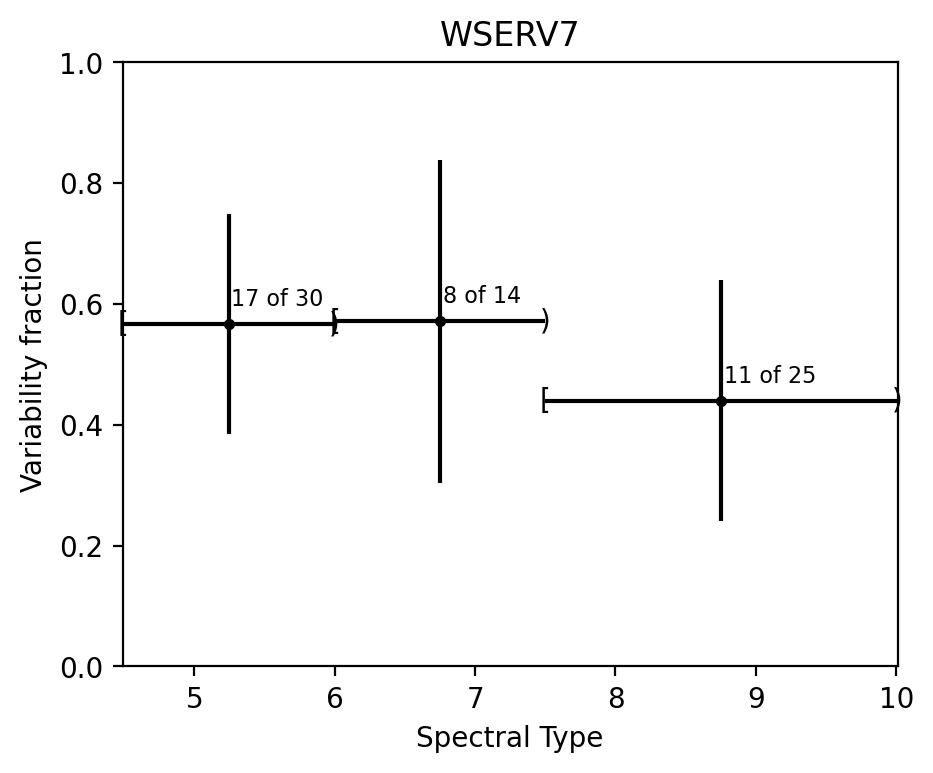

WSERV8:
59 225

4.49 6.0
In this bin :  148
In this bin & stat :  121
In this bin & stat & variable :  41
Variability fraction in this bin :  0.33884297520661155

6.0 7.5
In this bin :  34
In this bin & stat :  30
In this bin & stat & variable :  7
Variability fraction in this bin :  0.23333333333333334

7.5 10.01
In this bin :  40
In this bin & stat :  30
In this bin & stat & variable :  3
Variability fraction in this bin :  0.1



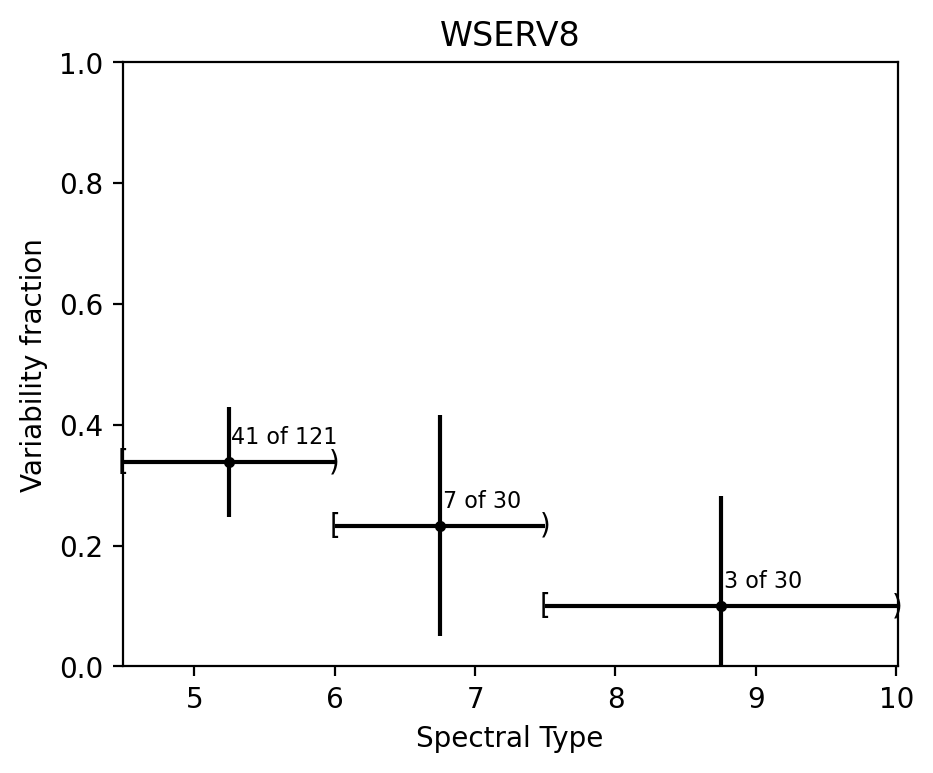

In [20]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6., 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    
    fig = plt.figure(figsize=(5,4), dpi=200)    
    ax = fig.add_subplot(111)

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
        errorbar_size = 1 / np.sqrt(bin_stat)
        print("Variability fraction in this bin : ", stat_var_fraction)
        
        print("")
        
        ax.errorbar([(left+right)/2], [stat_var_fraction], fmt='k.', yerr=errorbar_size)
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color='k')
        
        ax.text((left+right)/2 + 0.02, stat_var_fraction + 0.03, f"{bin_var_stat} of {bin_stat}", fontsize=8)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict)
        ax.text(right, stat_var_fraction, ")", center_dict)
        
    plt.xlim(bin_edges[0], bin_edges[-1])
    plt.ylim(0, 1)
    plt.title("WSERV" + str(wserv))
    plt.xlabel("Spectral Type")
    plt.ylabel("Variability fraction")
    plt.show()

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 5.5
In this bin :  116
In this bin & stat :  72
In this bin & stat & variable :  38
Variability fraction in this bin :  0.5277777777777778

5.5 6.5
In this bin :  60
In this bin & stat :  41
In this bin & stat & variable :  15
Variability fraction in this bin :  0.36585365853658536

6.5 7.5
In this bin :  93
In this bin & stat :  61
In this bin & stat & variable :  28
Variability fraction in this bin :  0.45901639344262296

7.5 8.5
In this bin :  40
In this bin & stat :  27
In this bin & stat & variable :  18
Variability fraction in this bin :  0.6666666666666666

8.5 10.01
In this bin :  25
In this bin & stat :  14
In this bin & stat & variable :  3
Variability fraction in this bin :  0.21428571428571427

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 5.5
In this bin :  21
In this bin & stat :  19
In this bin & stat & variable :  12
Variability fraction in this bin :  0.631578947368421

5.5 6.5
In this 

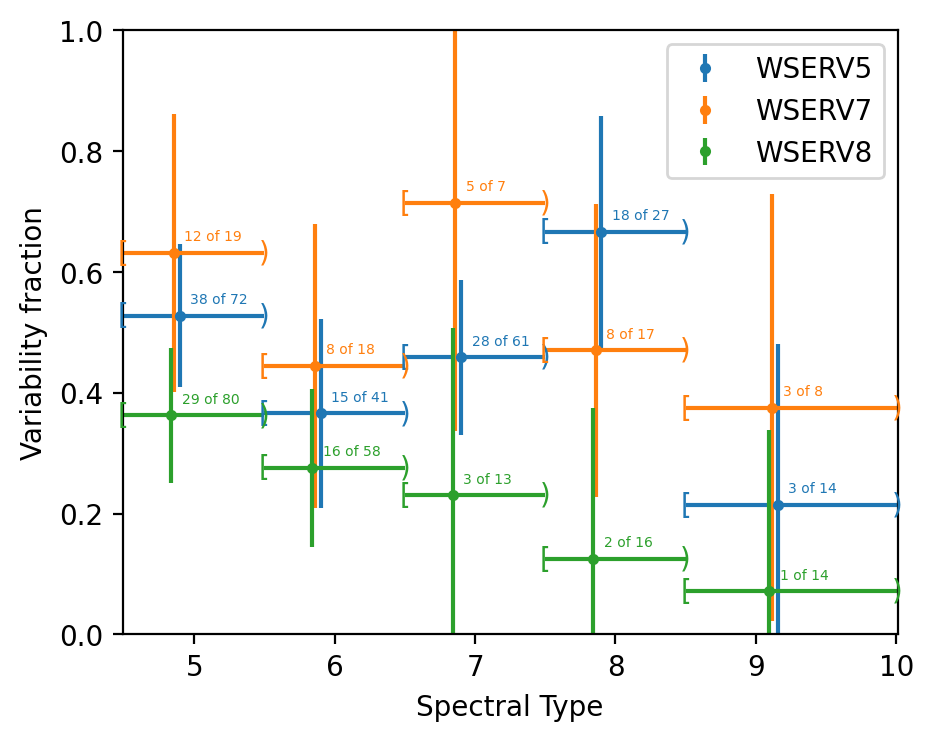

In [21]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 5.5, 6.5, 7.5, 8.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
        errorbar_size = 1 / np.sqrt(bin_stat)
        print("Variability fraction in this bin : ", stat_var_fraction)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_var_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_var_fraction + 0.02, f"{bin_var_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_var_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, 1)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Variability fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 6
In this bin :  157
In this bin & stat :  102
In this bin & stat & variable :  48
Variability fraction in this bin :  0.47058823529411764 ± 0.09686643404805527

6 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & variable :  33
Variability fraction in this bin :  0.4583333333333333 ± 0.11509238774154172

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & variable :  21
Variability fraction in this bin :  0.5121951219512195 ± 0.15300475629532673

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 6
In this bin :  38
In this bin & stat :  30
In this bin & stat & variable :  17
Variability fraction in this bin :  0.5666666666666667 ± 0.17732514600982965

6 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & variable :  8
Variability fraction in this bin :  0.5714285714285714 ± 0.25922962793631443

7.5 10.01
In this bin :  41
In this bin & stat :  25
In 

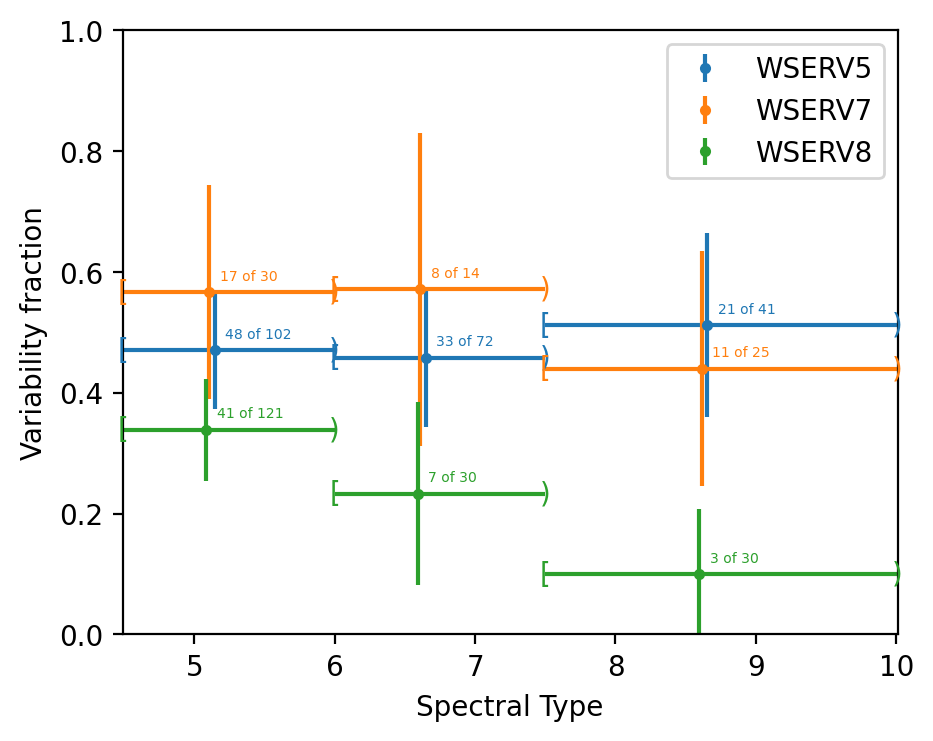

In [22]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6, 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_var_stat = np.sum(in_this_bin & var_stat)
        print("In this bin & stat & variable : ", bin_var_stat)
        stat_var_fraction = bin_var_stat / bin_stat
#         errorbar_size = 1 / np.sqrt(bin_stat)
        z = 1.96
        p = stat_var_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Variability fraction in this bin : ", stat_var_fraction, "±", errorbar_size)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_var_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_var_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_var_fraction + 0.02, f"{bin_var_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100)
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_var_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_var_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, 1)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Variability fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330

4.49 6
In this bin :  157
In this bin & stat :  102
In this bin & stat & periodic :  22
Periodic fraction in this bin :  0.21568627450980393 ± 0.07982007795972658

6 7.5
In this bin :  112
In this bin & stat :  72
In this bin & stat & periodic :  16
Periodic fraction in this bin :  0.2222222222222222 ± 0.09603097351271477

7.5 10.01
In this bin :  65
In this bin & stat :  41
In this bin & stat & periodic :  16
Periodic fraction in this bin :  0.3902439024390244 ± 0.1493173528300819

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103

4.49 6
In this bin :  38
In this bin & stat :  30
In this bin & stat & periodic :  10
Periodic fraction in this bin :  0.3333333333333333 ± 0.1686899413014786

6 7.5
In this bin :  22
In this bin & stat :  14
In this bin & stat & periodic :  4
Periodic fraction in this bin :  0.2857142857142857 ± 0.23664319132398465

7.5 10.01
In this bin :  41
In this bin & stat :  25
In this bin & stat &

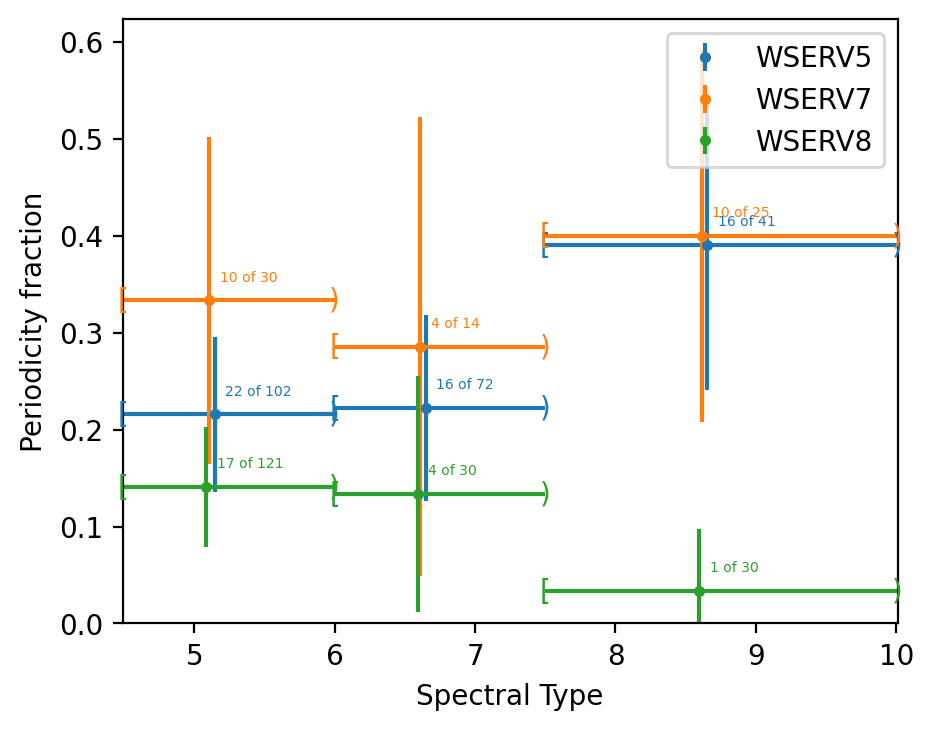

In [23]:
# Variability fraction (binned) vs spectral type...

# ok. 

# in each bin: 
# how many statisticals?
# how many statisticals which are variable?

color_dict = {5: 'C0', 7: 'C1', 8: 'C2'}
fig = plt.figure(figsize=(5,4), dpi=200)    
ax = fig.add_subplot(111)

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])


    # loop through bins
    
    bin_edges = [4.49, 6, 7.5, 10.01]
    left_edges = bin_edges[:-1]
    right_edges = bin_edges[1:]
    
    print("")
    

    for left, right in zip(left_edges, right_edges):
        
        in_this_bin = (x_match.approved['SpT'] >= left) & (x_match.approved['SpT'] < right)
        print(left, right)
        print("In this bin : ", np.sum(in_this_bin))
        bin_stat = np.sum(in_this_bin & x_crit)
        print("In this bin & stat : ", bin_stat)
        bin_per_stat = np.sum(in_this_bin & per_stat)
        print("In this bin & stat & periodic : ", bin_per_stat)
        stat_per_fraction = bin_per_stat / bin_stat
#         errorbar_size = 1 / np.sqrt(bin_stat)
        z = 1.96
        p = stat_per_fraction
        n = bin_stat
        errorbar_size = z * np.sqrt(p * (1-p) / n)
        
        print("Periodic fraction in this bin : ", stat_per_fraction, "±", errorbar_size)        
#         print("Periodic fraction in this bin : ", stat_per_fraction)
        
        print("")
        
        x_offset = - wserv/50
        
        ax.errorbar([(left+right)/2 + x_offset], [stat_per_fraction], fmt='.', yerr=errorbar_size, color=color_dict[wserv], label=f"WSERV{wserv}" if left==left_edges[0] else "")
        ax.hlines(y=stat_per_fraction, xmin=left, xmax=right, color=color_dict[wserv])
        
        ax.text((left+right)/2 + 0.075 + x_offset, stat_per_fraction + 0.02, f"{bin_per_stat} of {bin_stat}", fontsize=5, color=color_dict[wserv], zorder=100, ) 
        
        center_dict = {'verticalalignment': 'center', 'horizontalalignment': 'center'}
        ax.text(left, stat_per_fraction, "[", center_dict , color=color_dict[wserv])
        ax.text(right, stat_per_fraction, ")", center_dict, color=color_dict[wserv])
        
plt.xlim(bin_edges[0], bin_edges[-1])
plt.ylim(0, None)
plt.legend()
# plt.title("WSERV" + str(wserv))
plt.xlabel("Spectral Type")
plt.ylabel("Periodicity fraction")
plt.show()
    
    



WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


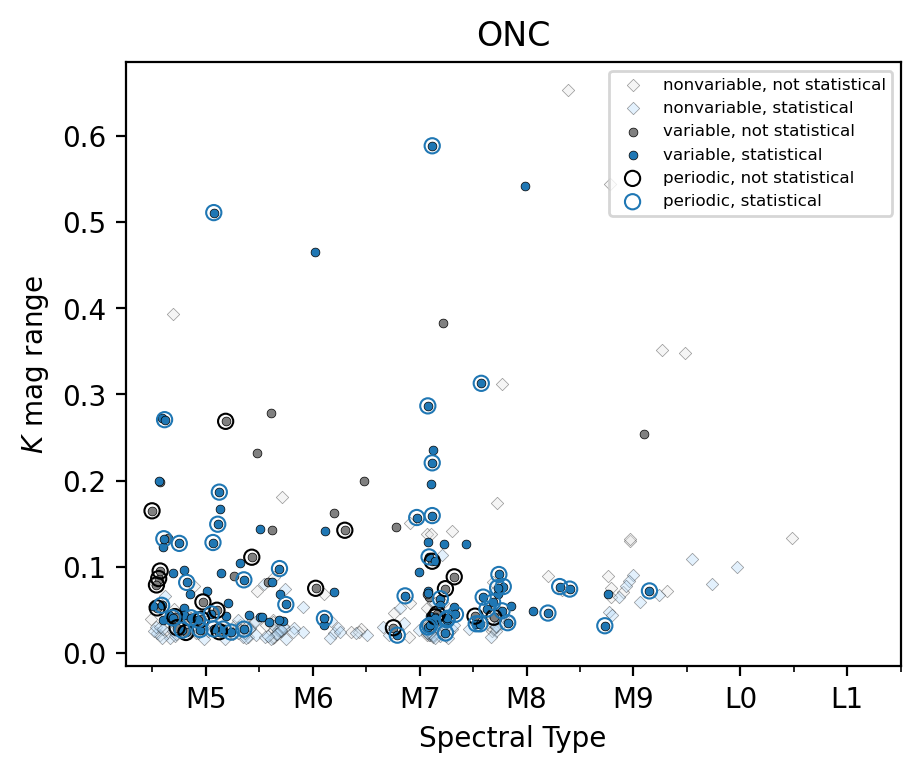

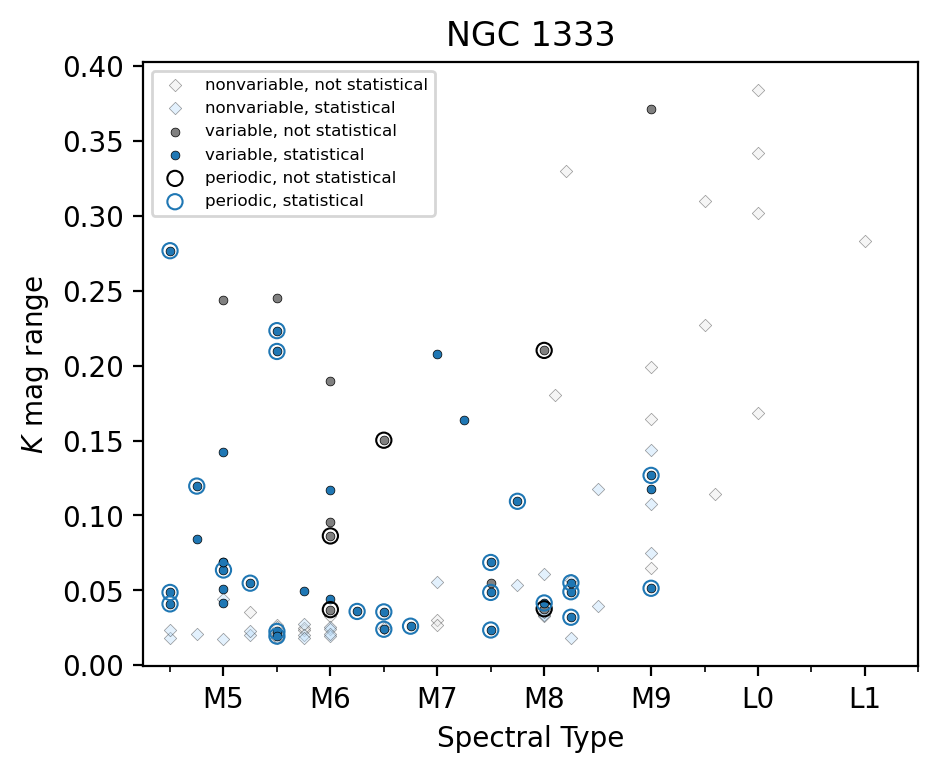

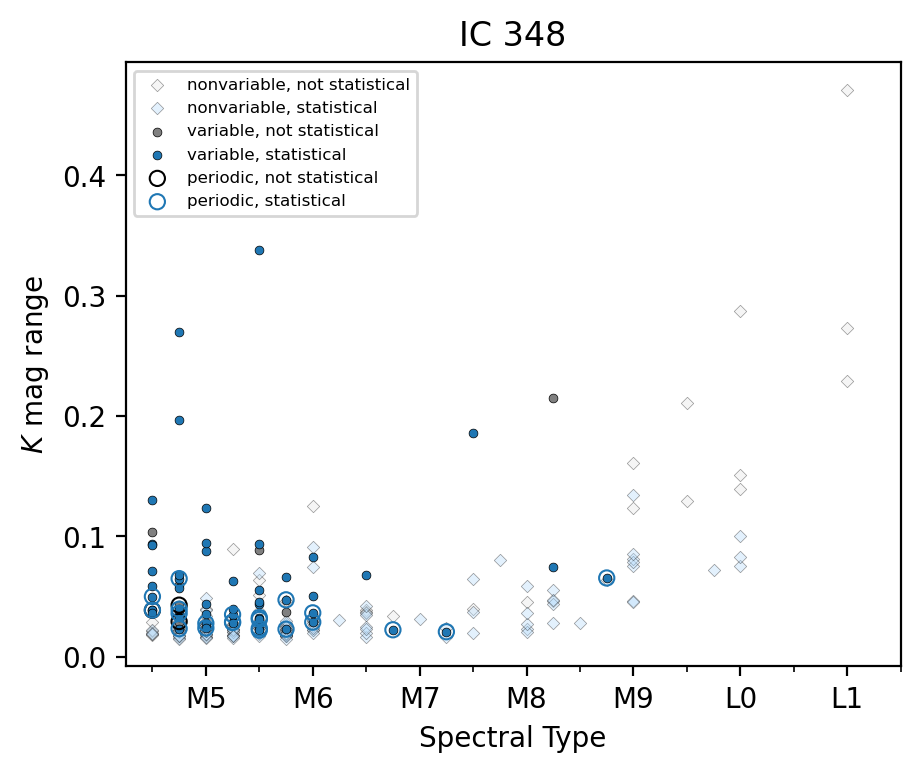

In [24]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['range_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['range_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['range_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['range_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['range_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['range_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("$K$ mag range")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [25]:
# TODO with more brain power:
# Figure out how to access the period sheet and its (period, amplitude) info such that we could readily plot 
# amplitude (and period!) vs spectral type.

In [26]:
def select_periodic_variables_experimental(wserv):

    ds = spread[f"wserv{wserv}"]

    flags = ["Y", "Yw", "N", "YfY", "?fY", "YfYw", "?fYw", "YfN", "?fN"]
    periodic_flags = [flag for flag in flags if flag[-1] in ("Y", "w")]

    period_sheet = pd.read_excel(
        os.path.join(
            period_directory,
            f"{short_names[wserv]}_source_properties_periods_inspected.xlsx",
        )
    )
    periodics = period_sheet[np.in1d(period_sheet["Periodic?"], periodic_flags)]
    periodics_by_sourceid = periodics.set_index("SOURCEID")

#     v_per = np.in1d(ds.index, periodics.values)
#     
    return periodics_by_sourceid



In [27]:
p5 = select_periodic_variables_experimental(5)

In [28]:
p5.index

Int64Index([44199508514777, 44199508513934, 44199508513687, 44199508512696,
            44199508512410, 44199508512929, 44199508512752, 44199508469615,
            44199508469644, 44199508512216, 44199508512217, 44199508512427,
            44199508511913, 44199508511973, 44199508511914, 44199508469694,
            44199508469696, 44199508469840, 44199508469998, 44199508469253,
            44199508469301, 44199508514002, 44199508513449, 44199508513463,
            44199508513747, 44199508512975, 44199508513072, 44199508512982,
            44199508512965, 44199508512424, 44199508511996, 44199508511895,
            44199508470345, 44199508470557, 44199508470698, 44199508469125,
            44199508471912, 44199508469098, 44199508469091, 44199508472007,
            44199508515842, 44199508512256, 44199508515643, 44199508518686,
            44199508519183, 44199508521476, 44199508519013, 44199508518967,
            44199508519228, 44199508519493, 44199508519964, 44199508519643,
            

In [31]:


p5['Period']

SOURCEID
44199508514777     0.903965
44199508513934     1.770217
44199508513687     2.950133
44199508512696     3.410000
44199508512410     3.660000
                    ...    
44199508513170     8.645507
44199508511927     3.286577
44199508511903     3.100000
44199508565018    11.123479
44199508565551     1.800000
Name: Period, Length: 78, dtype: float64

In [32]:
random_sourceid_list = [44199508512696, 44199508514777, 44199508513934]

p5["Period"][random_sourceid_list]

SOURCEID
44199508512696    3.410000
44199508514777    0.903965
44199508513934    1.770217
Name: Period, dtype: float64

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


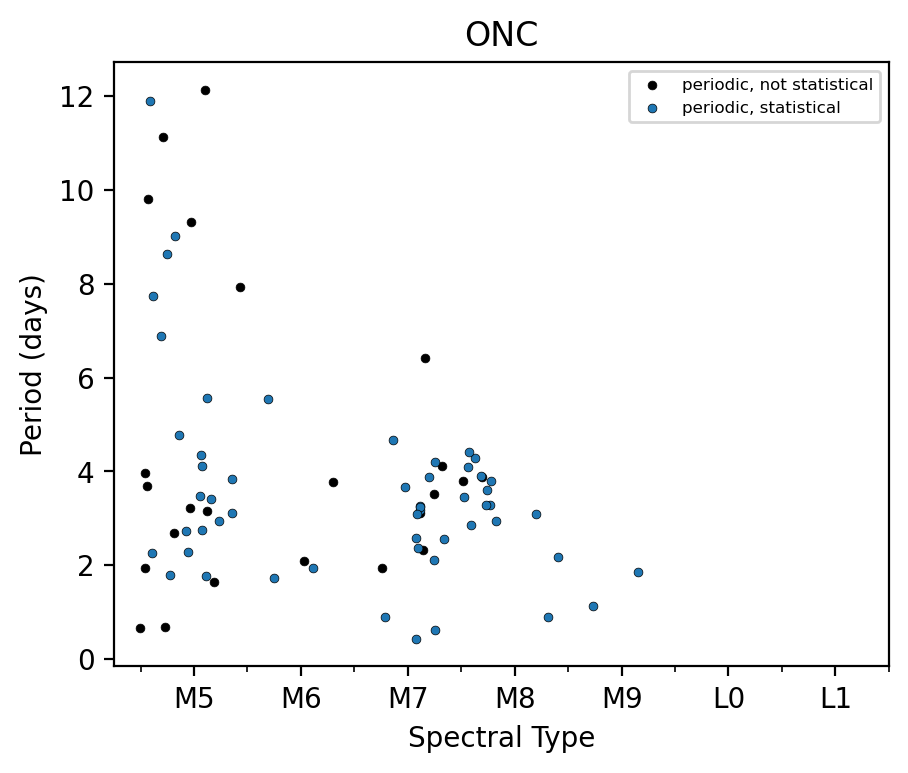

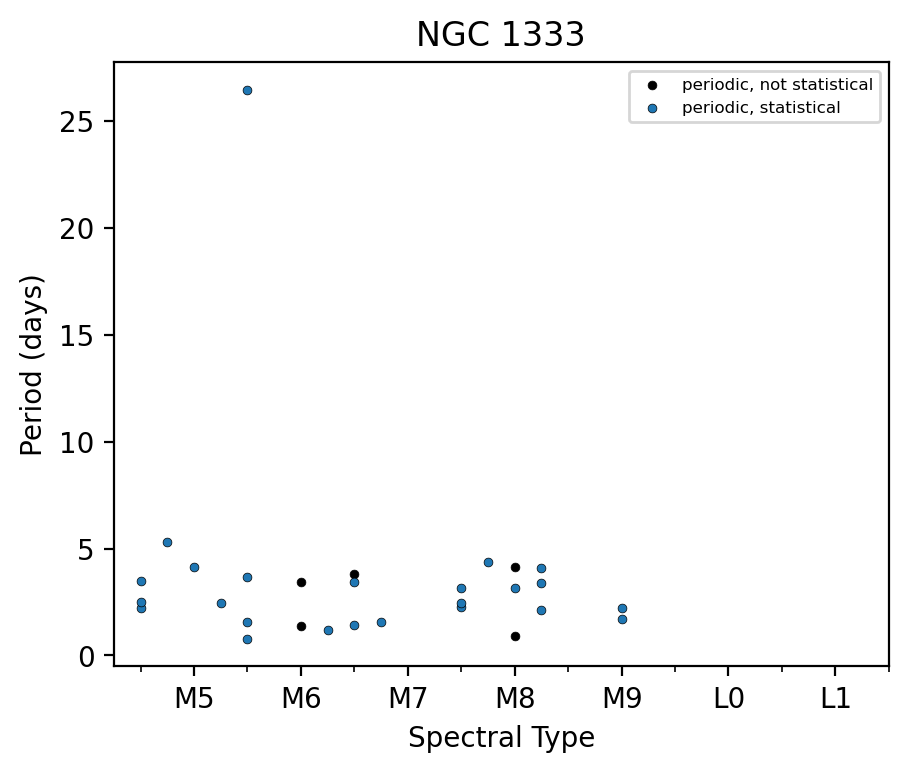

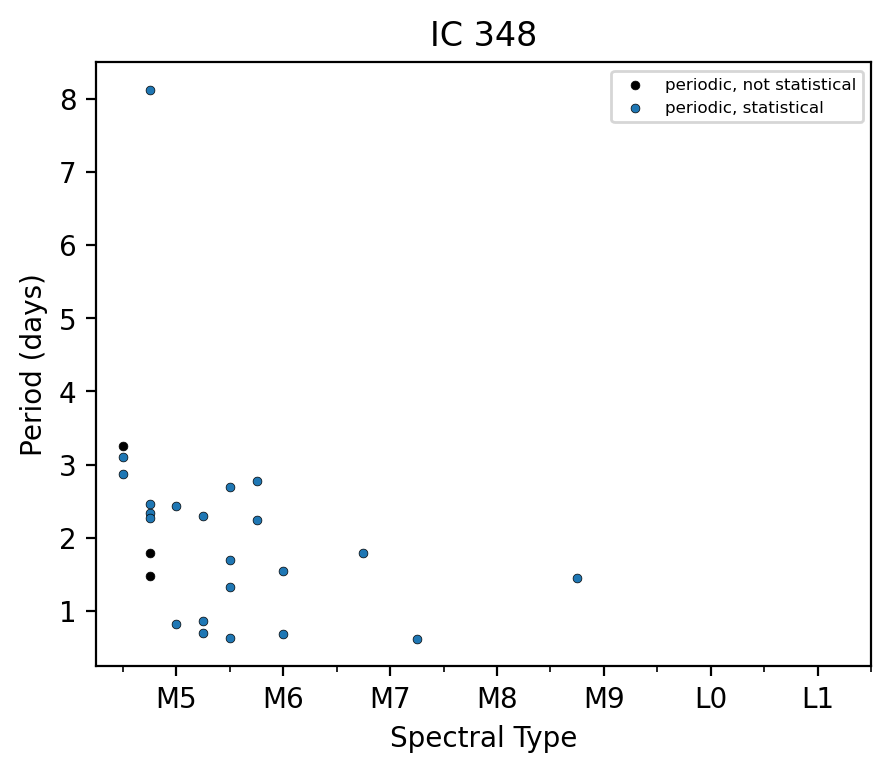

In [46]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per['Period'],
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat['Period'],
        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Period (days)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


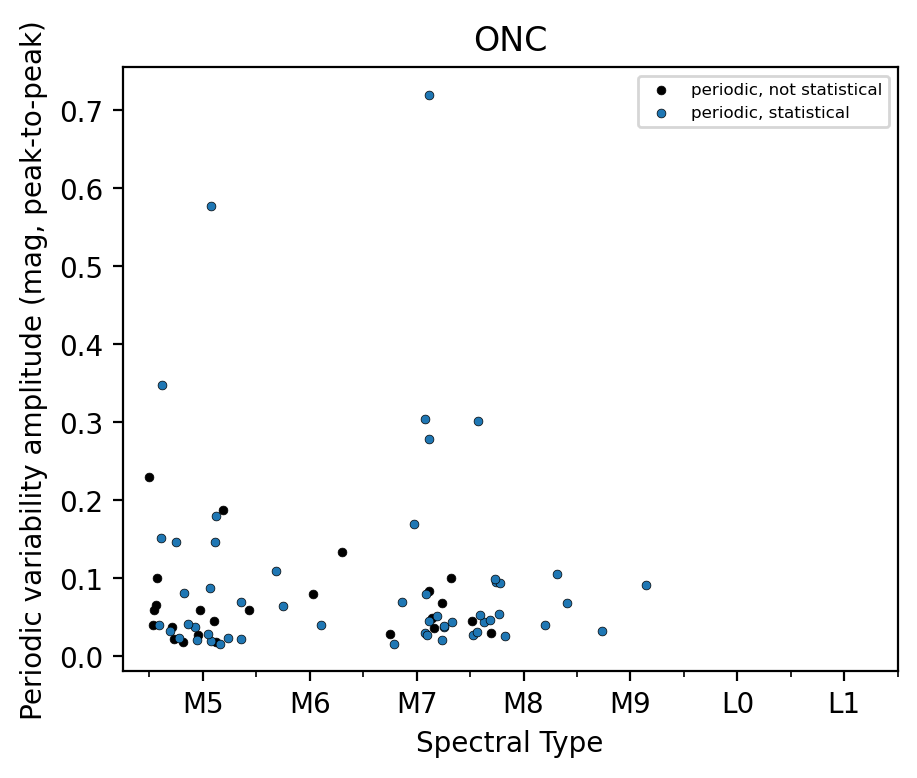

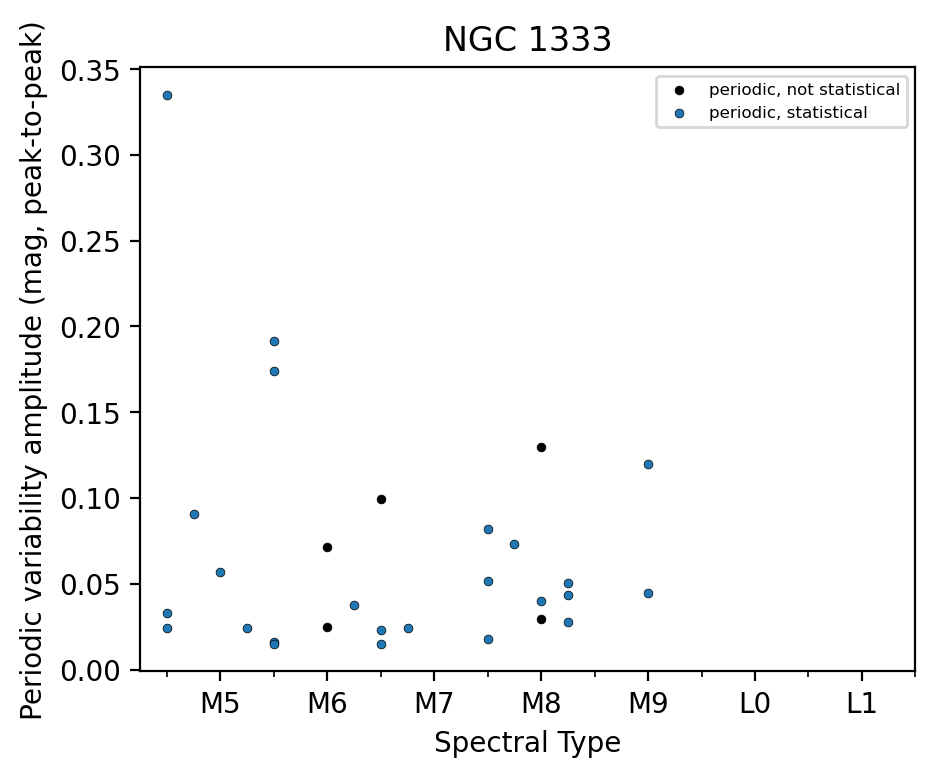

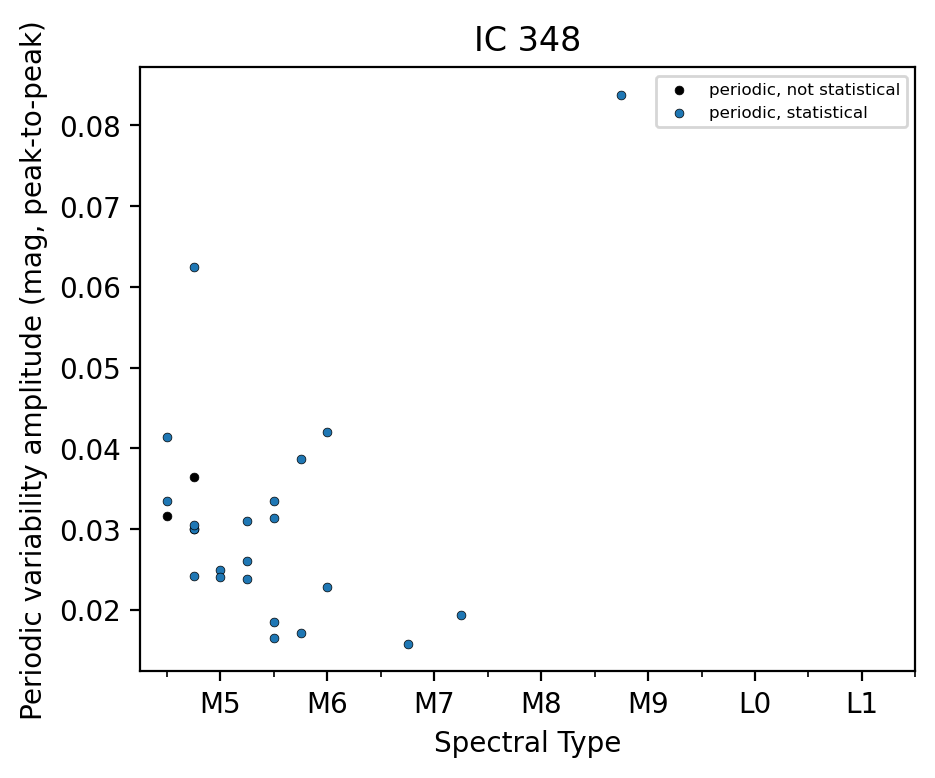

In [50]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [48]:
p5

,index,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,Teff,SpT,...,period_H,per_amp_H,per_fap_H,period_K,per_amp_K,per_fap_K,Periodic?,Period,Amp,Color? (dK/dJ)
SOURCEID,,,,,,,,,,,,,,,,,,,,,
44199508514777,10,onc_010C_M6.8_Q2,C,83.666668,-5.434450,13.240740,12.691378,12.300497,2903,6.790909,...,0.904401,0.006863,7.028356e-05,0.903339,0.009598,5.275832e-03,YfY,0.903965,0.008105,1.222227
44199508513934,17,onc_017C_M5.1_Q2,C,83.704469,-5.440711,13.181342,12.440687,11.922566,3110,5.111111,...,1.770531,0.069937,2.579833e-09,1.770217,0.063787,9.888111e-08,YfY,1.770217,0.073239,0.741773
44199508513687,21,onc_021C_M7.8_Q2,C,83.721122,-5.441007,14.748690,14.195631,13.693901,2740,7.823529,...,2.946364,0.014522,1.492344e-08,2.952453,0.011081,2.600654e-04,Y,2.950133,0.012874,0.851223
44199508512696,23,onc_023C_M5.2_Q2,C,83.784400,-5.486703,13.800041,13.077027,12.691057,3103,5.162963,...,3.396725,0.007518,1.275583e-06,0.772675,0.009019,2.862588e-05,?fY,3.410000,0.008000,NaN
44199508512410,24,onc_024C_M7.0_Q2,C,83.800213,-5.468968,14.403092,13.635997,13.038030,2883,6.972727,...,3.661647,0.085026,2.909585e-05,3.650952,0.064669,4.612371e-06,YfY,3.660000,0.084757,0.618381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199508513170,310,onc_310C_M4.8_Q2,C,83.746225,-5.605953,13.796206,12.622706,11.950447,3161,4.751724,...,8.635543,0.083103,9.815711e-35,8.643006,0.069892,3.413644e-34,Y,8.645507,0.073095,1.054346
44199508511927,316,onc_316C_M7.7_Q2,C,83.829121,-5.623177,14.788036,14.170068,13.619843,2756,7.729412,...,3.287297,0.054149,2.282152e-21,3.285137,0.034930,8.235967e-13,Y,3.286577,0.049339,0.592653
44199508511903,318,onc_318C_M8.2_Q2,C,83.830630,-5.620549,15.780732,15.230381,14.726851,2648,8.200000,...,3.104613,0.021730,5.626785e-10,3.092133,0.017618,1.507785e-05,YfY,3.100000,0.020000,NaN


# The same as the above, but zoomed in and unified

WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


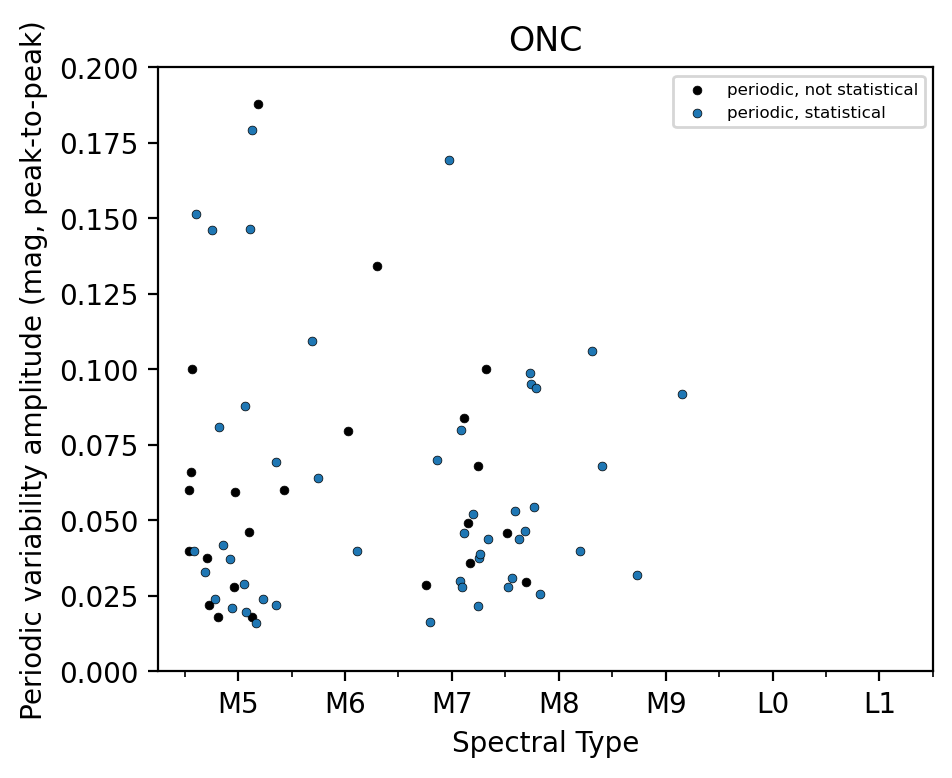

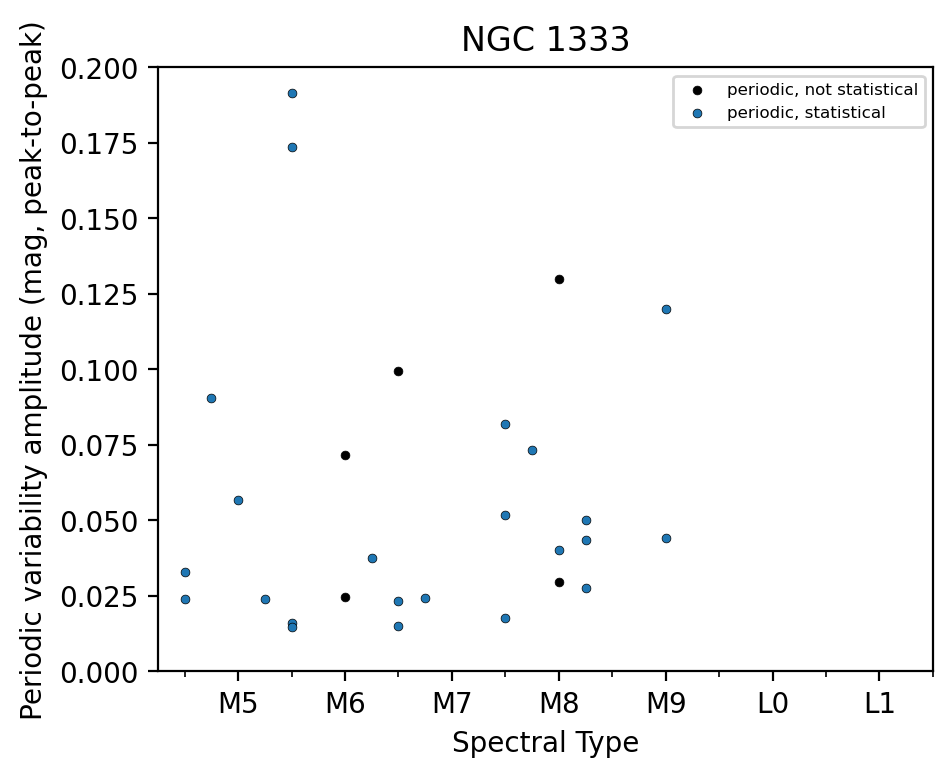

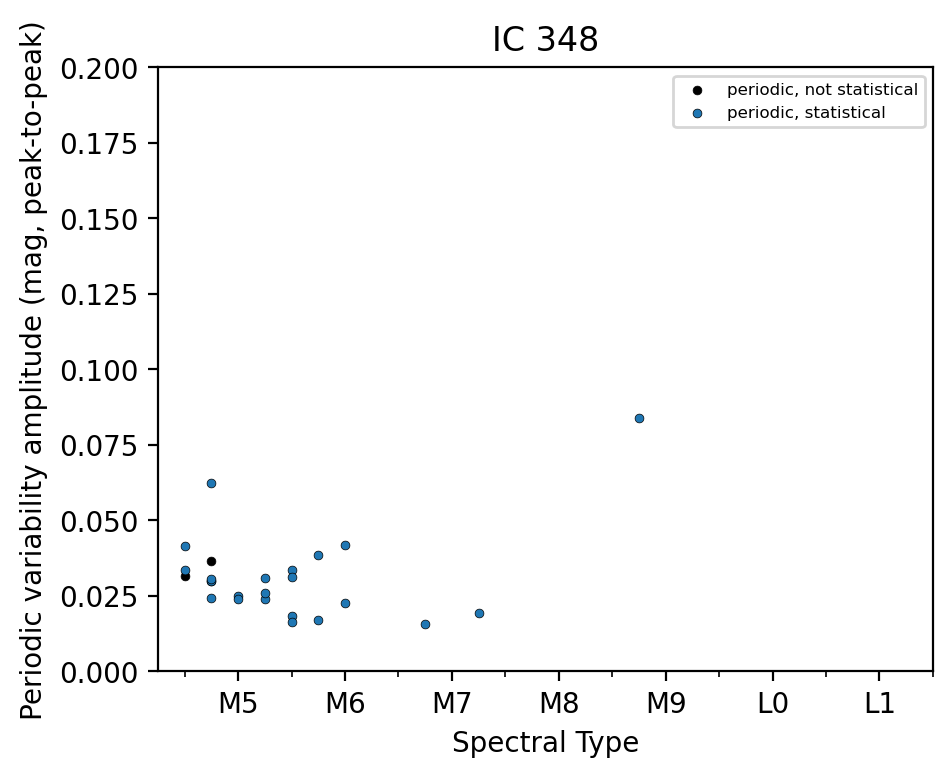

In [51]:
for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_ylim(0, 0.2)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


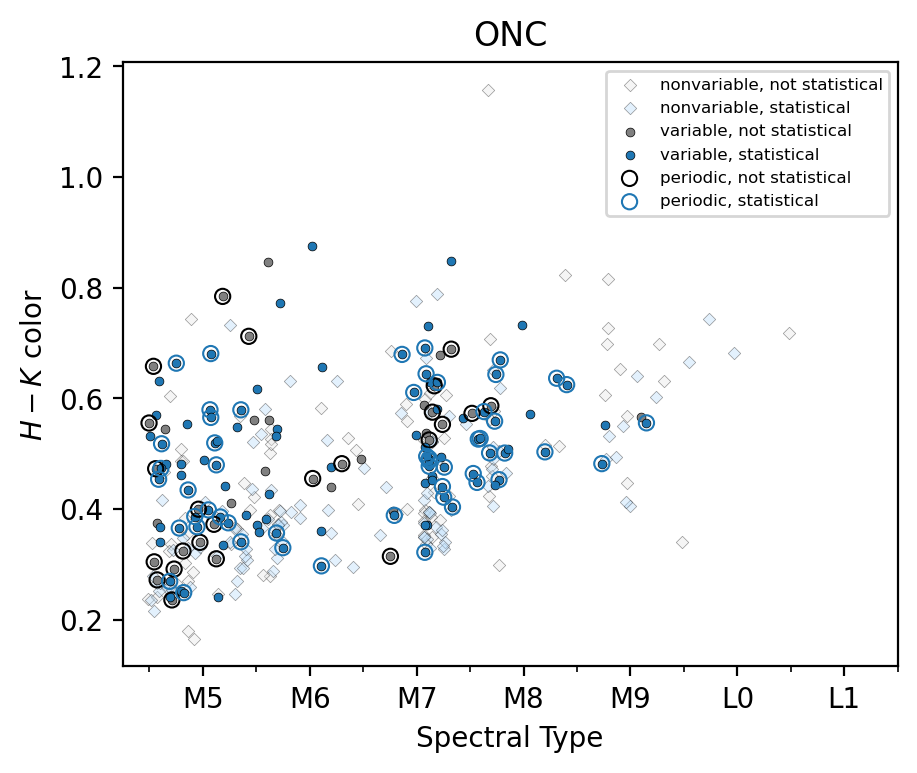

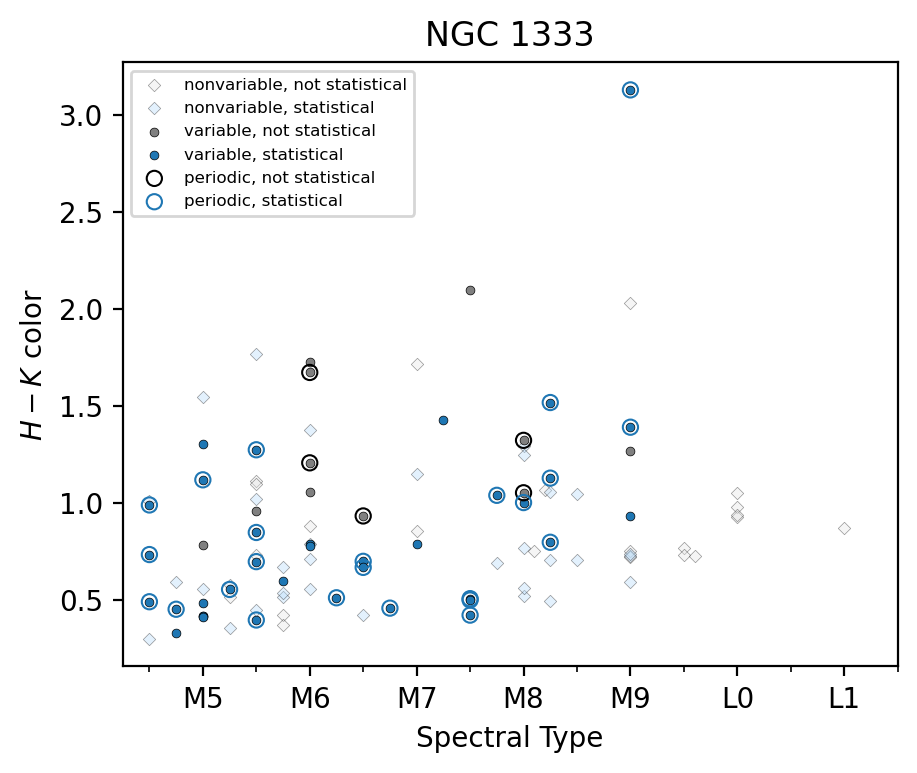

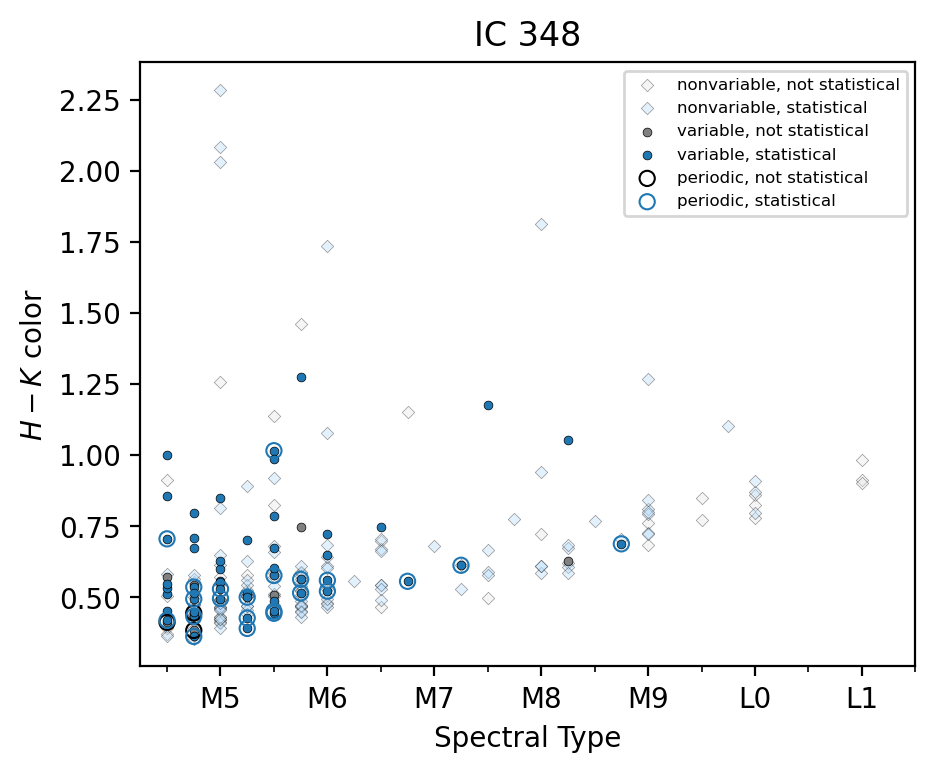

In [53]:
# Next: H-K color vs SpT

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['median_HMKPNT'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['median_HMKPNT'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['median_HMKPNT'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['median_HMKPNT'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['median_HMKPNT'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['median_HMKPNT'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("$H-K$ color")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV5:
Ref: 330
v2: 81
v1: 86
v_per: 78
v_subj: 16
138 330
WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


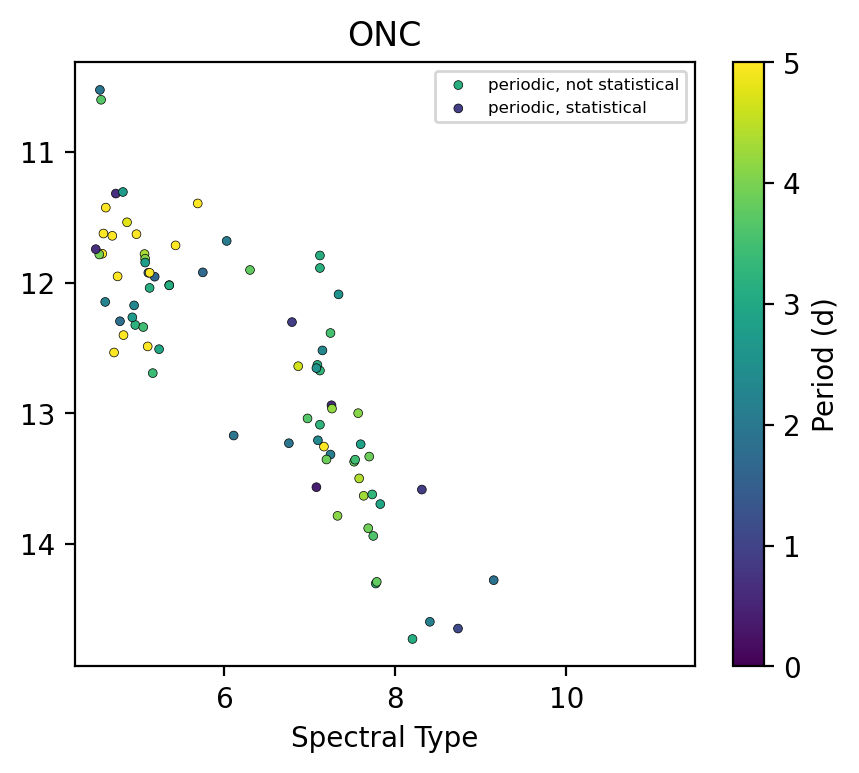

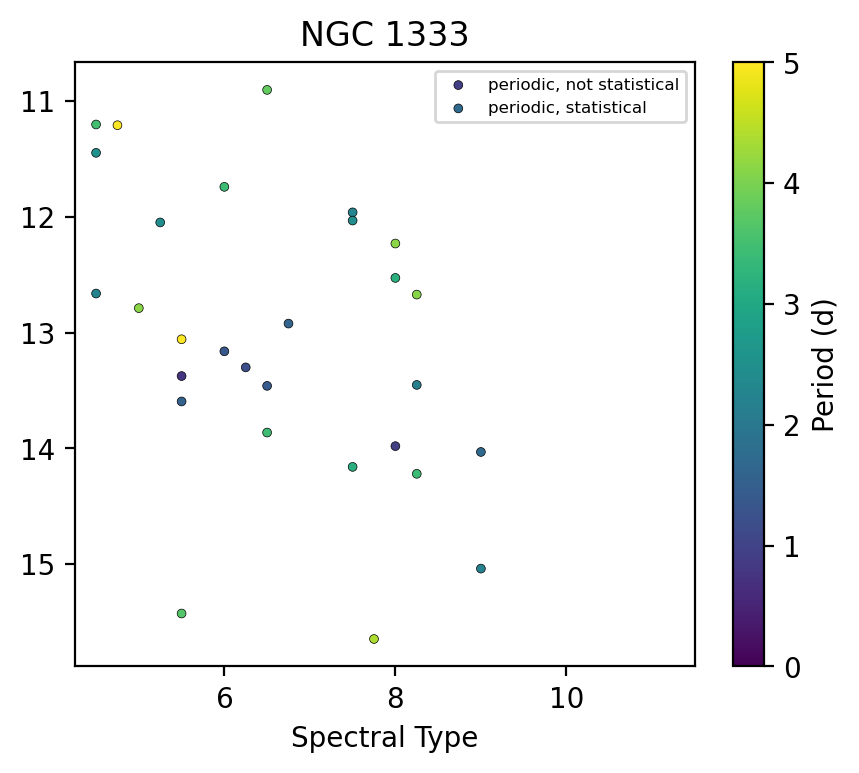

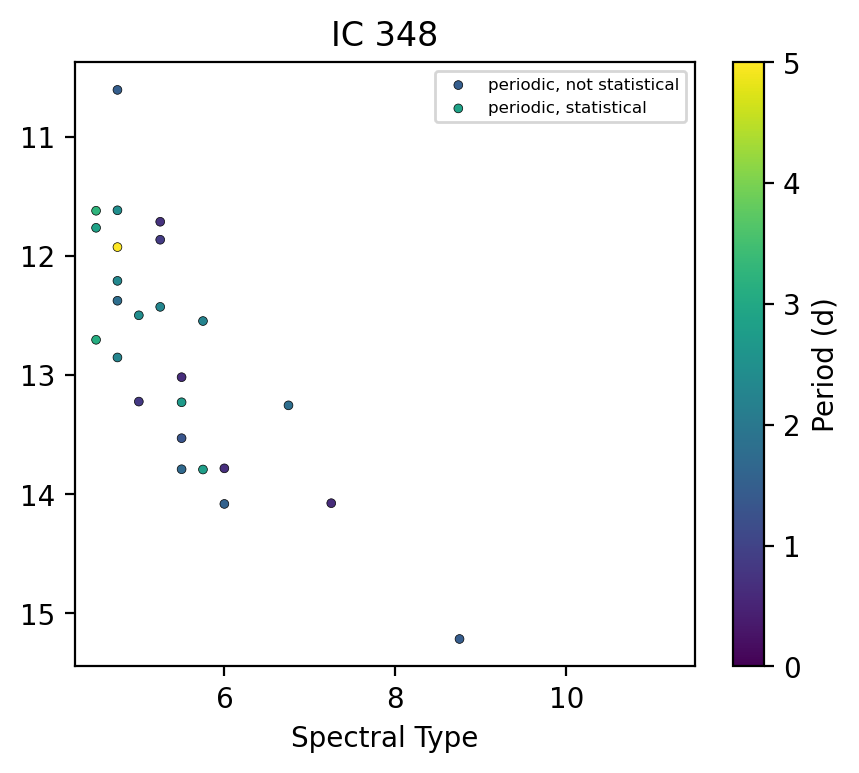

In [62]:
# Now... an HR diagram color-coded by variability amplitude

for wserv in [5, 7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    sc = ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['median_KAPERMAG3'][per], 
        c=period_table_per['Period'],
        s=10, 
        linewidths=0.25,
#         c='k',
        ec='k',
        label='periodic, not statistical',
        vmin=0,
        vmax=5,
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['median_KAPERMAG3'][per_stat], 
        c=period_table_per_stat['Period'],
        s=10, 
        linewidths=0.25,
#         c='C0',
        ec='k',
        label='periodic, statistical',
        vmin=0,
        vmax=5,
    )
    
    ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
#     ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")
    
    cbar = plt.colorbar(sc)
    cbar.set_label("Period (d)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
#     ax.set_ylim(0, 0.2)
    
    ax.set_title(full_names[wserv])
#     plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [63]:
stat



# a
# a
# a
# a
# a

array([False, False, False, ..., False, False, False])

In [71]:
%run ../prototype2_of_variability_full_criteria.py

WSERV5:
Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26

WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

WSERV8:
Ref: 225 (Stat: 181)
v2: 37 (37)
v1: 40 (39)
v_per: 25 (22)
v_subj: 6 (2)
59 225
v_total: 59 (51)
Statistical variability rate: 51/181 = 0.28
Statistical periodicity rate: 22/181 = 0.12



In [4]:
stat = select_targets(7,attr='statistical') 
disks = select_disks(7, attr='statistical')
nondisks = select_disks(7, attr='statistical', choice='no')
np.sum(stat), np.sum(disks), np.sum(nondisks)

(69, 43, 26)

In [82]:
43 + 26

69

In [5]:
stat = select_targets(8, attr='statistical') 
disks = select_disks(8, attr='statistical')
nondisks = select_disks(8, attr='statistical', choice='no')

np.sum(stat), np.sum(disks), np.sum(nondisks)


(181, 73, 107)

In [8]:
ngc_match.approved['IRexc']

yes
no
no
no
yes
no
no
no
yes
...
no


In [83]:
73 + 107

180

False

In [84]:
# :Let's now do something for disked / non disked

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


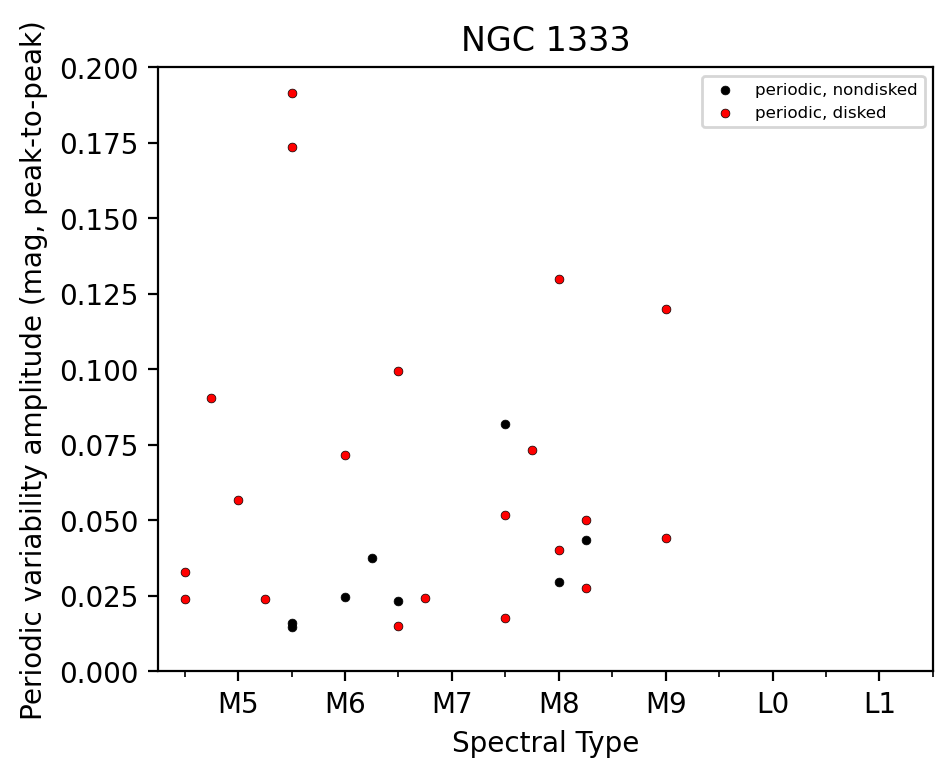

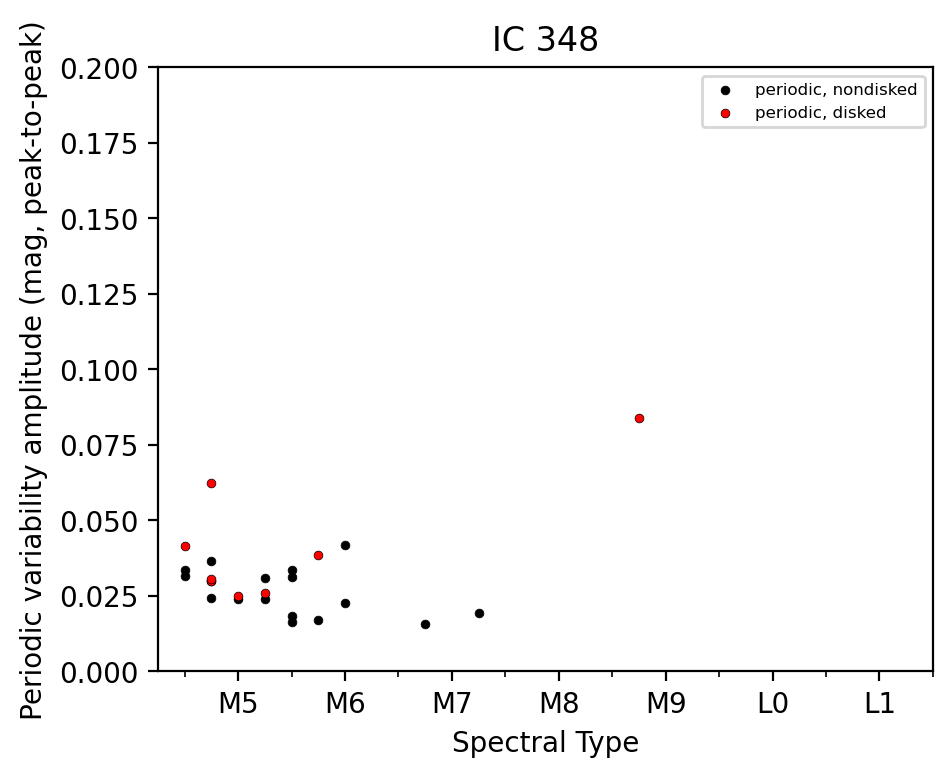

In [94]:
# for wserv in [5, 7, 8]:
for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]
    
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

#     ax.scatter(
#         x_match.approved['SpT'][per], 
# #         x_match.approved['range_KAPERMAG3'][per], 
#         period_table_per['Amp']*2,
#         s=10, 
#         linewidths=0.25,
#         c='k',
#         ec='k',
#         label='periodic, not statistical'
#     )
#     ax.scatter(
#         x_match.approved['SpT'][per_stat], 
# #         x_match.approved['range_KAPERMAG3'][per_stat], 
#         period_table_per_stat['Amp']*2,
#         s=10, 
#         linewidths=0.25,
#         c='C0',
#         ec='k',
#         label='periodic, statistical'
#     )

    ax.scatter(
        x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_nondisk['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='k',
        ec='k',
        label='periodic, nondisked'
    )    
    
    
    ax.scatter(
        x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_disk['Amp']*2,
        s=10, 
        linewidths=0.25,
        c='r',
        ec='k',
        label='periodic, disked'
    )

#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Periodic variability amplitude (mag, peak-to-peak)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_ylim(0, 0.2)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


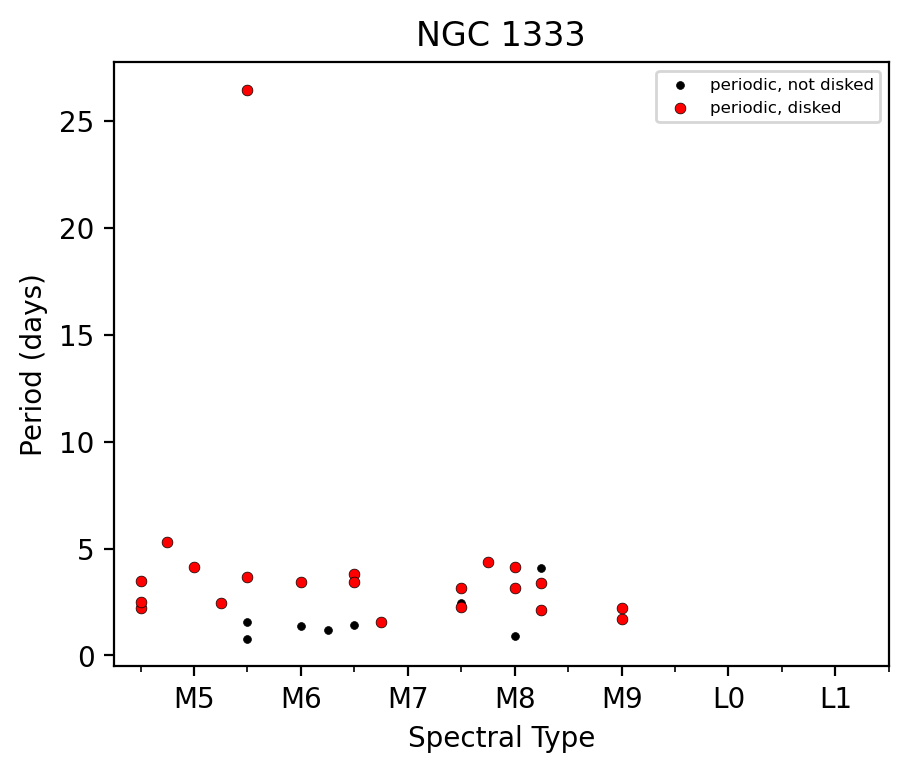

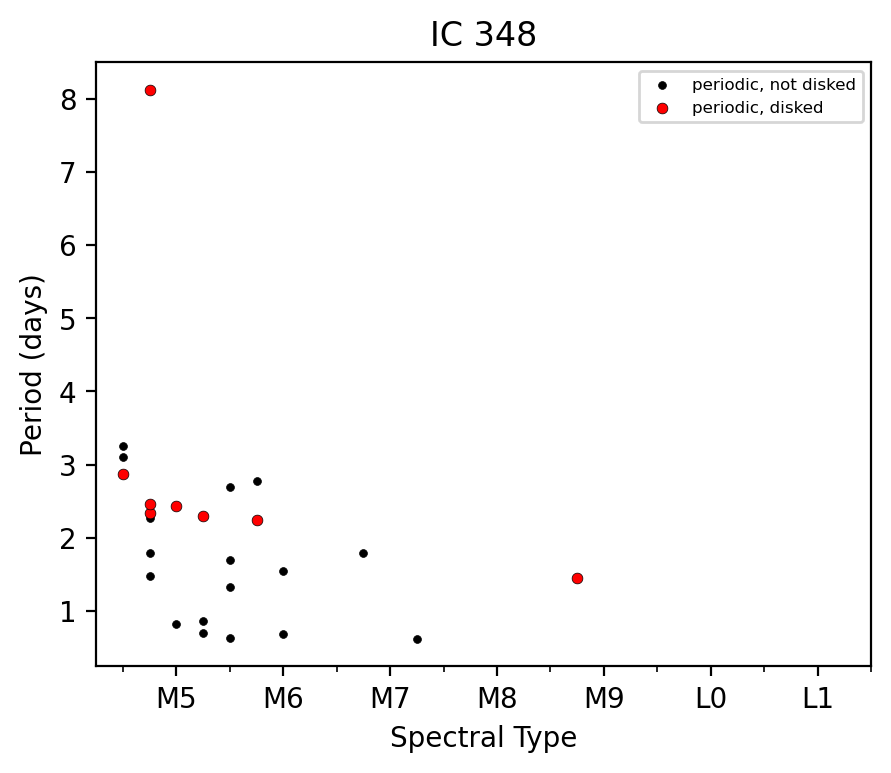

In [101]:
for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    
    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per], 
        period_table_per_nondisk['Period'],
        s=8, 
        linewidths=0.25,
        marker='o',
        c='k',
        ec='k',
        label='periodic, not disked'
    )
    ax.scatter(
        x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_disk['Period'],
        s=15, 
        linewidths=0.25,
        c='r',
        ec='k',
        label='periodic, disked'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Period (days)")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
disked: 56
nondisked: 42
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
disked: 92
nondisked: 122
59 225


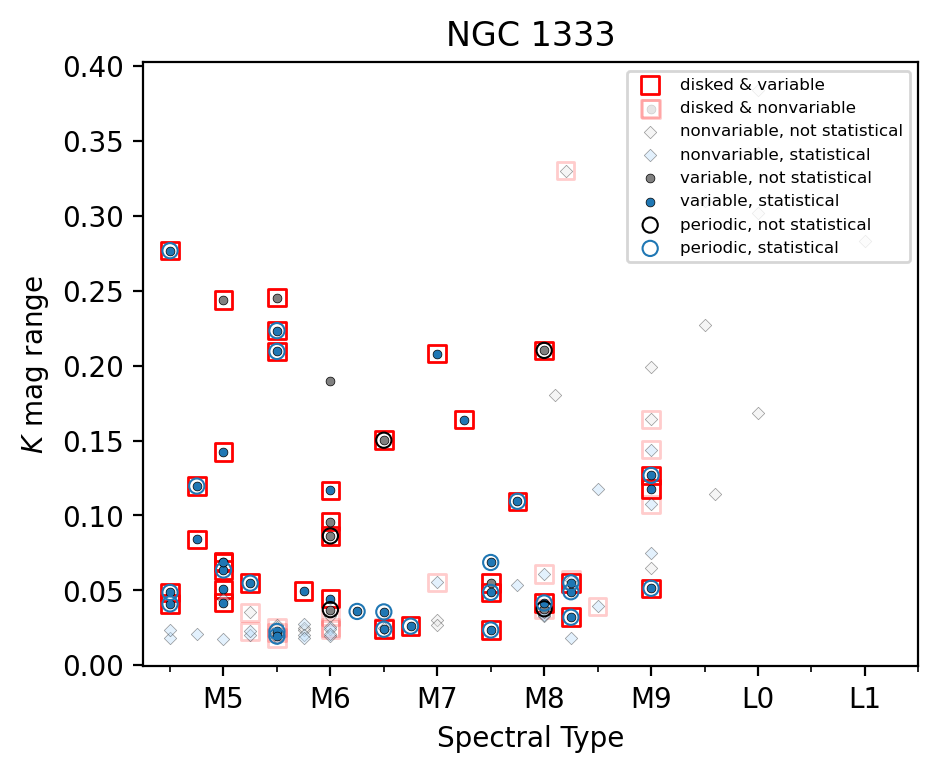

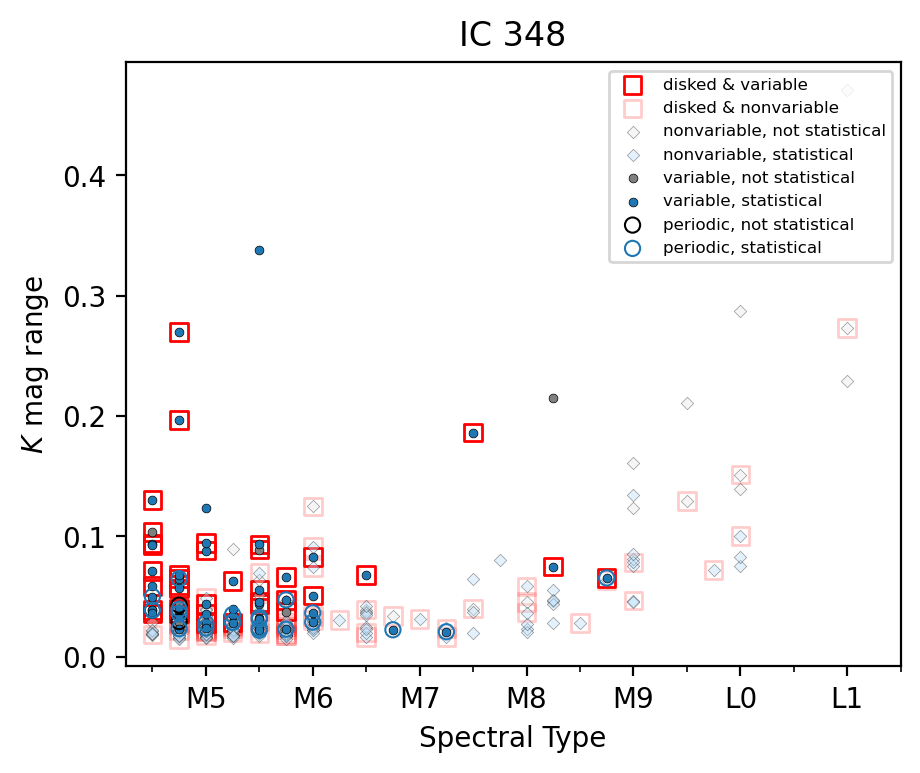

In [112]:
for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    

    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)

    ax.scatter(
        x_match.approved['SpT'][disked & (var|var_stat)], 
        x_match.approved['range_KAPERMAG3'][disked & (var|var_stat)], 
        marker='s',
        s=40, 
        linewidths=1,
        c='None',
        ec='r',
        label='disked & variable',
#         alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][disked & ~(var|var_stat)], 
        x_match.approved['range_KAPERMAG3'][disked & ~(var|var_stat)], 
        marker='s',
        s=40, 
        linewidths=1,
        c='None',
        ec='r',
        label='disked & nonvariable',
        alpha=0.2,
    )

    ax.scatter(
        x_match.approved['SpT'][nonvar], 
        x_match.approved['range_KAPERMAG3'][nonvar], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='0.9',
        ec='k',
        label='nonvariable, not statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][nonvar_stat], 
        x_match.approved['range_KAPERMAG3'][nonvar_stat], 
        marker='D',
        s=10, 
        linewidths=0.25,
        c='#bbdefb',
        ec='k',
        label='nonvariable, statistical',
        alpha=0.4,
    )
    ax.scatter(
        x_match.approved['SpT'][var], 
        x_match.approved['range_KAPERMAG3'][var], 
        s=10, 
        linewidths=0.25,
        c='0.5',
        ec='k',
        label='variable, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][var_stat], 
        x_match.approved['range_KAPERMAG3'][var_stat], 

        s=10, 
        linewidths=0.25,
        c='C0',
        ec='k',
        label='variable, statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per], 
        x_match.approved['range_KAPERMAG3'][per], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='k',
        label='periodic, not statistical'
    )
    ax.scatter(
        x_match.approved['SpT'][per_stat], 
        x_match.approved['range_KAPERMAG3'][per_stat], 
        s=30, 
        linewidths=0.75,
        facecolor='None',
        ec='C0',
        label='periodic, statistical'
    )
    
#     ax.invert_yaxis()

    ax.set_xlim(4.25, 11.5)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("$K$ mag range")

    xticks = ax.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6, loc='upper right')
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


In [113]:
# OH! Q: what's the relative variability rate among disked and non-disked objects (statistical)?

In [114]:
for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    

    


WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
disked: 56
nondisked: 42
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
disked: 92
nondisked: 122
59 225


In [120]:
%run ../prototype2_of_variability_full_criteria.py

WSERV5:
Ref: 330 (Stat: 211)
v2: 81 (81)
v1: 86 (84)
v_per: 78 (54)
v_subj: 16 (2)
138 330
v_total: 138 (100)
Statistical variability rate: 100/211 = 0.47
Statistical periodicity rate: 54/211 = 0.26



WSERV7:
Ref: 103 (Stat: 69)
v2: 29 (29)
v1: 31 (30)
v_per: 29 (24)
v_subj: 6 (0)
47 103
v_total: 47 (36)
Statistical variability rate: 36/69 = 0.52
Statistical periodicity rate: 24/69 = 0.35

Disks: 56 (Stat: 43)
Non-disks: 42 (Stat: 26)
Variable Disks: 38 (Stat: 30)
Variable Non-disks: 8 (Stat: 6)
Statistical DISKED variability rate: 30/43 = 0.70
Statistical DISKED periodicity rate: 18/43 = 0.42
Statistical NONDISKED variability rate: 6/26 = 0.23
Statistical NONDISKED periodicity rate: 6/26 = 0.23


WSERV8:
Ref: 225 (Stat: 181)
v2: 37 (37)
v1: 40 (39)
v_per: 25 (22)
v_subj: 6 (2)
59 225
v_total: 59 (51)
Statistical variability rate: 51/181 = 0.28
Statistical periodicity rate: 22/181 = 0.12

Disks: 92 (Stat: 73)
Non-disks: 122 (Stat: 107)
Variable Disks: 37 (Stat: 33)
Variable Non-disks:

WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
disked: 56
nondisked: 42
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
disked: 92
nondisked: 122
59 225


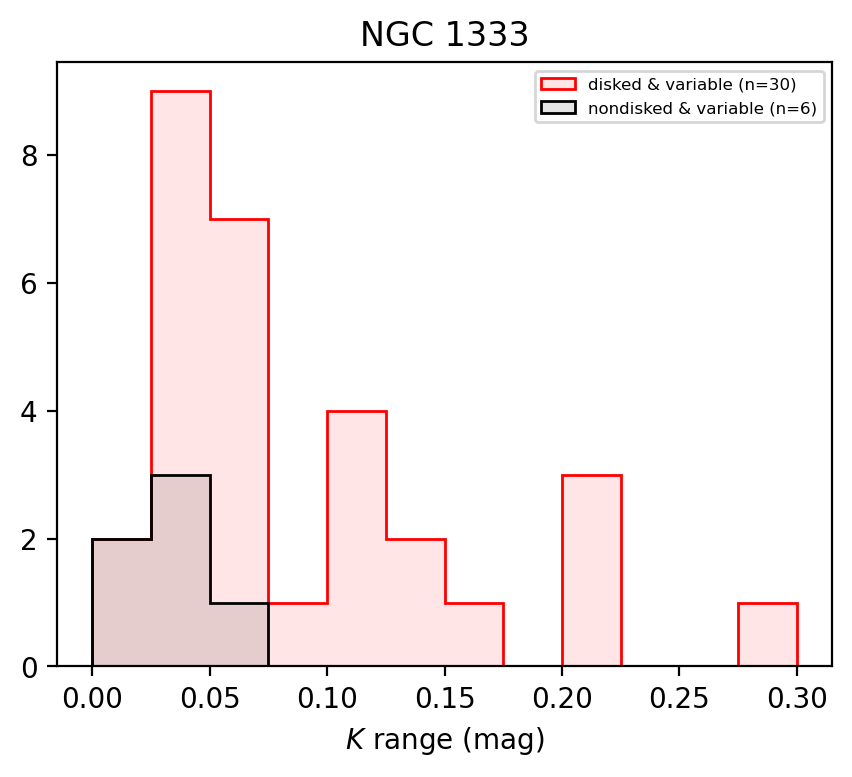

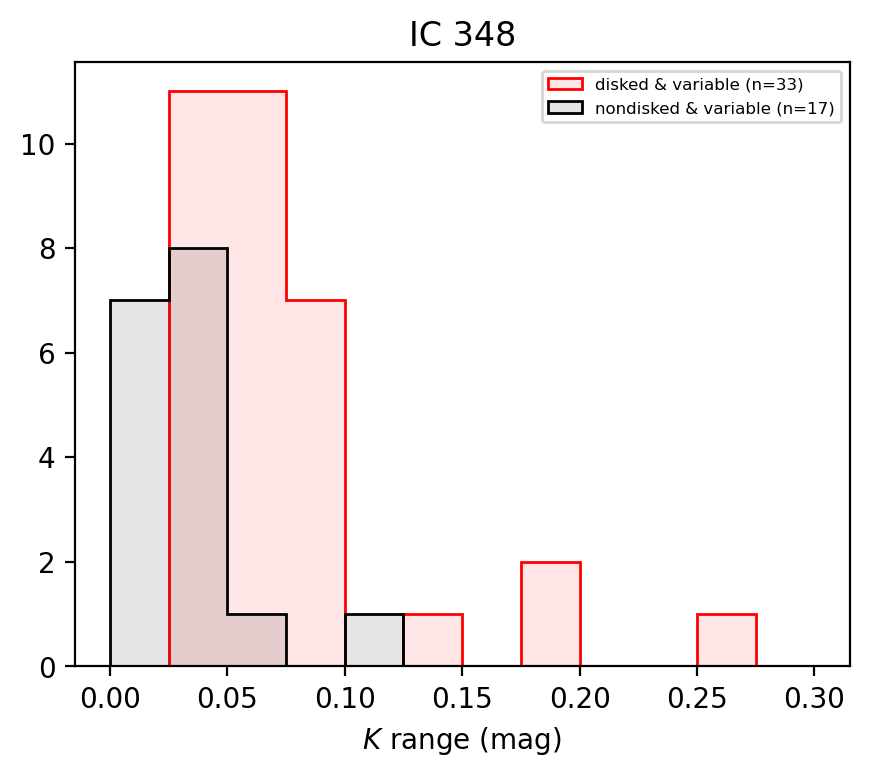

In [153]:
# Ok, we want to make a pair of histograms. On the same figure.

# Histogram #1  (black, I think): variability amplitudes of non-disked statistical objects in each field. 
# No differentiation by spectral type.

for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)
    
    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')    

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")
    print(f"disked: {np.sum(ref & disks)}")
    print(f"nondisked: {np.sum(ref & nondisks)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    disked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & disks])
    nondisked = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & nondisks])
    
    n_disked_and_variable = np.sum(disked & (var_stat))
    n_nondisked_and_variable = np.sum(nondisked & (var_stat))
    
        
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)
    
    histrange = [0, 0.3]
    n_bins = 12


    ax.hist(
        x_match.approved['range_KAPERMAG3'][disked & (var_stat)], 
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
        label=f'disked & variable (n={n_disked_and_variable})',
        
    )
    ax.hist(
        x_match.approved['range_KAPERMAG3'][nondisked & (var_stat)], 
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),
        label=f'nondisked & variable (n={n_nondisked_and_variable})',
    )

    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    ax.set_xlabel("$K$ range (mag)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6, loc='upper right')
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    


WSERV7:
Ref: 103
v2: 29
v1: 31
v_per: 29
v_subj: 6
47 103
WSERV8:
Ref: 225
v2: 37
v1: 40
v_per: 25
v_subj: 6
59 225


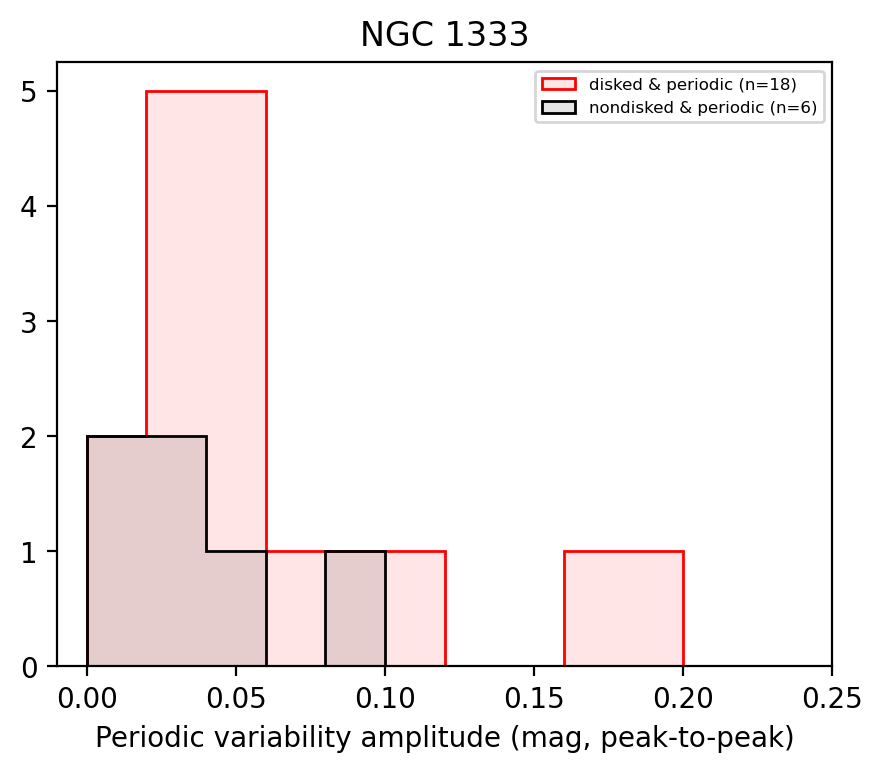

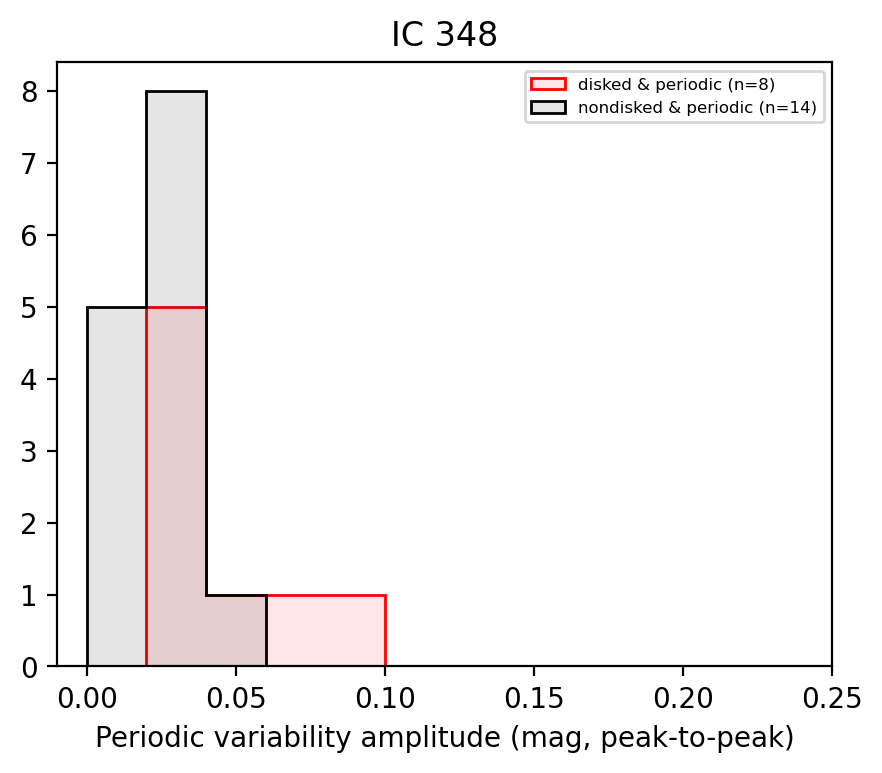

In [165]:
# for wserv in [5, 7, 8]:
for wserv in [7, 8]:

    print(f"WSERV{wserv}:")

    ref = select_targets(wserv)
    stat = select_targets(wserv, attr='statistical')    

    disks = select_disks(wserv)
    nondisks = select_disks(wserv, choice='no')
    
    v2, v1 = select_stetson_variables(wserv)
    v_per = select_periodic_variables(wserv)
    v_subj = select_subjective_variables(wserv)

    print(f"Ref: {np.sum(ref)}")
    print(f"v2: {np.sum(ref & v2)}")
    print(f"v1: {np.sum(ref & v1)}")
    print(f"v_per: {np.sum(ref & v_per)}")
    print(f"v_subj: {np.sum(ref & v_subj)}")

    vv = select_variables(wserv)
    
    # plot stuff appears below
    
    x_match = reference_dict[wserv]
    ds = spread[f"wserv{wserv}"]
    
    x_crit = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat])
    
    nonvar = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & ~stat & ~vv])
    nonvar_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & stat & ~vv])
    var = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & ~stat])
    var_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & vv & stat])
    per = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & ~stat])
    per_stat = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat])
    
    per_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & disks])
    per_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & nondisks])
    
    per_stat_disks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & disks])
    per_stat_nondisks = np.in1d(x_match.approved['SOURCEID'], ds.index[ref & v_per & stat & nondisks])
    
#     print(x_match.approved['SOURCEID'][per])
#     break
    
    
    period_table = select_periodic_variables_experimental(wserv)
    period_table_per = period_table.loc[x_match.approved['SOURCEID'][per]]
    period_table_per_stat = period_table.loc[x_match.approved['SOURCEID'][per_stat]]
    period_table_per_stat_disk = period_table.loc[x_match.approved['SOURCEID'][per_stat_disks]]
    period_table_per_stat_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_stat_nondisks]]

    period_table_per_disk = period_table.loc[x_match.approved['SOURCEID'][per_disks]]
    period_table_per_nondisk = period_table.loc[x_match.approved['SOURCEID'][per_nondisks]]

    
    n_disked_and_variable = np.sum(per_stat_disks)
    n_nondisked_and_variable = np.sum(per_stat_nondisks)
    
    histrange = [0, 0.2]
    n_bins = 10
    
    
    
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax = fig.add_subplot(111)


    
    
    ax.hist(
#         x_match.approved['SpT'][per_disks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_disk['Amp']*2,
#         s=10, 
#         linewidths=0.25,
        range=histrange,
        bins=n_bins,
#         color='r',
        histtype='stepfilled',
        ec='r',
        fc=(1, 0, 0, 0.1),
#         ec='k',
        label=f'disked & periodic (n={n_disked_and_variable})',
    )

    ax.hist(
        
#         x_match.approved['SpT'][per_nondisks], 
#         x_match.approved['range_KAPERMAG3'][per_stat], 
        period_table_per_stat_nondisk['Amp']*2,
        range=histrange,
        bins=n_bins,
        color='k',
        histtype='stepfilled',
        ec='k',
        fc=(0,0,0, 0.1),        
        label=f'nondisked & periodic (n={n_nondisked_and_variable})',
    )    
#     ax.invert_yaxis()

#     ax.set_xlim(4.25, 11.5)
#     ax.set_xlabel("Spectral Type")
    ax.set_xlabel("Periodic variability amplitude (mag, peak-to-peak)")

#     xticks = ax.get_xticks()
#     xticks_minor = np.arange(4.5, 12, 0.5)
#     ax.set_xticks(xticks_minor, minor=True)
#     new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
#     ax.set_xticklabels(new_xtick_labels)
    
    ax.set_xlim(None, 0.25)
    
    ax.set_title(full_names[wserv])
    plt.legend(fontsize=6)
#     plt.savefig(f"randomtitle_{short_names[wserv]}.pdf")
    
